# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/bus.png?raw=true" width=800, align="left"/>

- 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
- 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다.

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [68]:
# 기본 경로
path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [69]:
# 구글 드라이브 연결, 패스 지정
# import sys
# if 'google.colab' in sys.modules:
#     from google.colab import drive
#     drive.mount('/content/drive')
#     path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [70]:
# 한글 표시를 위한 라이브러리 설치
# !pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [71]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

- 제공 데이터
    - 버스 승하차 및 운행 노선 데이터
    - 구별 유동인구 데이터
    - 구별 주민 등록 데이터
    - 구별 업종 등록 정보
    
#### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

# 1. 데이터 불러오기

- 이전 과정에서 저장한 다음 4개의 파일을 불러와 데이터프레임으로 선언합니다.
    - 구별 버스 정류장 데이터(df_seoul_bus_station.csv) → df_seoul_bus_station
    - 구별 유동인구 데이터(df_seoul_moving.csv) → df_seoul_moving
    - 구별 상권 데이터(df_seoul_business.csv) → df_seoul_business
    - 구별 인구 데이터(df_seoul_people.csv) → df_seoul_people

In [72]:
# 구별 버스 정류장 데이터불러오기
df_seoul_bus_station = pd.read_csv(path + 'df_seoul_bus_station.csv')

# 확인
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994


In [73]:
# 구별 유동인구 데이터 불러오기
df_seoul_moving = pd.read_csv(path + 'df_seoul_moving.csv')

# 확인
df_seoul_moving.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01


In [74]:
#  구별 상권 데이터 불러오기
df_seoul_business = pd.read_csv(path + 'df_seoul_business.csv')

# 확인
df_seoul_business.head()

,자치구,한식 일반 음식점업,커피전문점,기타주점업,택시운송업
0,종로구,5912,3613,1413,215
1,중구,6414,3542,982,235
2,용산구,2987,2076,1332,523
3,성동구,2785,1859,621,2527
4,광진구,2861,1887,1577,1744


In [75]:
# 구별 인구 데이터 불러오기
df_seoul_people = pd.read_csv(path + 'df_seoul_people.csv')

# 확인
df_seoul_people.head()

,자치구,남자,여자,합계
0,종로구,71654,78390,150044
1,중구,63365,68392,131757
2,용산구,105480,113343,218823
3,성동구,136779,146555,283334
4,광진구,166541,183141,349682


# 2. 데이터 합치기

- 위에서 선언한 네 개의 데이터프레임을 '자치구'열을 기준으로 조인(merge)합니다.
- 조인 결과를 df 데이터프레임으로 선언합니다.

In [76]:
# 네 개의 데이터프레임 조인(megre)
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df = pd.merge(df, df_seoul_business, how='inner', on='자치구')
df = pd.merge(df, df_seoul_people, how='inner', on='자치구')

In [77]:
# 확인
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,한식 일반 음식점업,커피전문점,기타주점업,택시운송업,남자,여자,합계
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,51766253.76,11486,7273,2528,2517,268993,293762,562755
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,25664489.79,3388,1660,1349,4980,228197,239705,467902
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,14200518.80,2663,1095,1275,2589,139260,150567,289827
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,26137612.75,4584,2530,1709,6922,270025,294460,564485
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,21022812.01,3689,2049,1672,2027,248571,248566,497137


# 3. 가설 수립 
$ \huge X \rightarrow Y $
- 가설을 수립해 보세요. (3개 이상)
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요.
- 다양한 가설이 가능하나, 프로젝트 주제에 맞게 '노선 수'에 대한 가설도 포함해 주세요.

### 1) 가설 1: 노선수 대비 승하차이용객수, 정류장 수가 많다면 노선이 필요한 곳일 것이다.

### 2) 가설 2: 

### 3) 가설 3: 

### 4) 가설 4: 

### 5) 가설 5: 

# 4. 단변량 분석

- 변수의 비즈니스 의미  
- 숫자형, 범주형 구분  
- 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
- 기초통계량
- 분포  
- 위 정보로부터 파악한 내용(비즈니스) 정리  
- 추가 분석해볼 사항 도출 등

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구          25 non-null     object 
 1   정류장수         25 non-null     int64  
 2   노선수          25 non-null     int64  
 3   승차총승객수       25 non-null     int64  
 4   하차총승객수       25 non-null     int64  
 5   승차평균승객수      25 non-null     float64
 6   하차평균승객수      25 non-null     float64
 7   평균 이동 시간(분)  25 non-null     float64
 8   이동인구(합)      25 non-null     float64
 9   총 이동 시간      25 non-null     int64  
 10  총 이동인구       25 non-null     float64
 11  한식 일반 음식점업   25 non-null     int64  
 12  커피전문점        25 non-null     int64  
 13  기타주점업        25 non-null     int64  
 14  택시운송업        25 non-null     int64  
 15  남자           25 non-null     int64  
 16  여자           25 non-null     int64  
 17  합계           25 non-null     int64  
dtypes: float64(5), int64(12), object(1)
memory usage: 3.

### 비즈니스 의미

* 자치구 : 자치구 명
* 정류장수 : 해당 자치구에 존재하는 정류장 수 총 합
* 노선수 : 해당 자치구를 지나는 노선 수 총 합
* 승차총승객수 : 해당 자치구에서 버스를 탄 승객 수 총 합
* 하차총승객수 : 해당 자치구에서 버스를 내린 승객 수 총 합
* 승차평균승객수 : 해당 자치구를 지나는 노선, 정류장에서 버스를 탄 승객 수 평균
* 하차평균승객수 : 해당 자치구를 지나는 노선, 정류장에서 버스를 내린 승객 수 평균
* 평균 이동 시간(분) : 해당 자치구에서 버스를 이용하는 승객의 평균 이동 시간 (분)
* 이동인구(합) : 해당 자치구로 도착한 인구 수 평균
* 총 이동 시간 : 해당 자치구에서 버스를 이용한 승객의 총 이동 시간
* 총 이동 인구 : 해당 자치구로 도착한 인구 수 합
* 한식 일반 음식점업 : 해당 자치구에 존재하는 한식 일반 음식점 수 총 합
* 커피전문점 : 해당 자치구에 존재하는 커피전문점 수 총 합
* 기타주점업 : 해당 자치구에 존재하는 기타주점업 수 총 합
* 남자 : 해당 자치구의 남자 인구 수
* 여자 : 해당 자치구의 여자 인구 수
* 합계 : 해당 자치구의 총 인구 수 (남자 + 여자)

In [79]:
categorical = [col for col in df.columns if df[col].dtypes == object]
numerical = [col for col in df.columns if df[col].dtypes != object]

print(categorical)
print(numerical)

['자치구']
['정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수', '평균 이동 시간(분)', '이동인구(합)', '총 이동 시간', '총 이동인구', '한식 일반 음식점업', '커피전문점', '기타주점업', '택시운송업', '남자', '여자', '합계']


In [80]:
def one_variable(col:str,
                 norm:str=None):
       
    if norm != None:
           tmp = df[['자치구', norm, col]]
           tmp[col] /= tmp[norm]
           tmp = tmp.sort_values(col, ascending=False)
    else:
       tmp = (df[['자치구', col]]
              .sort_values(col, ascending=False))
    
    plt.figure(figsize=(15,8))
    sns.barplot(data=tmp,
                x='자치구', y=col,
                color='gray')
    plt.axhline(y=tmp[col].mean(),
                color='r', linestyle='--')
    plt.grid()
    plt.show()

### 1) 정류장수

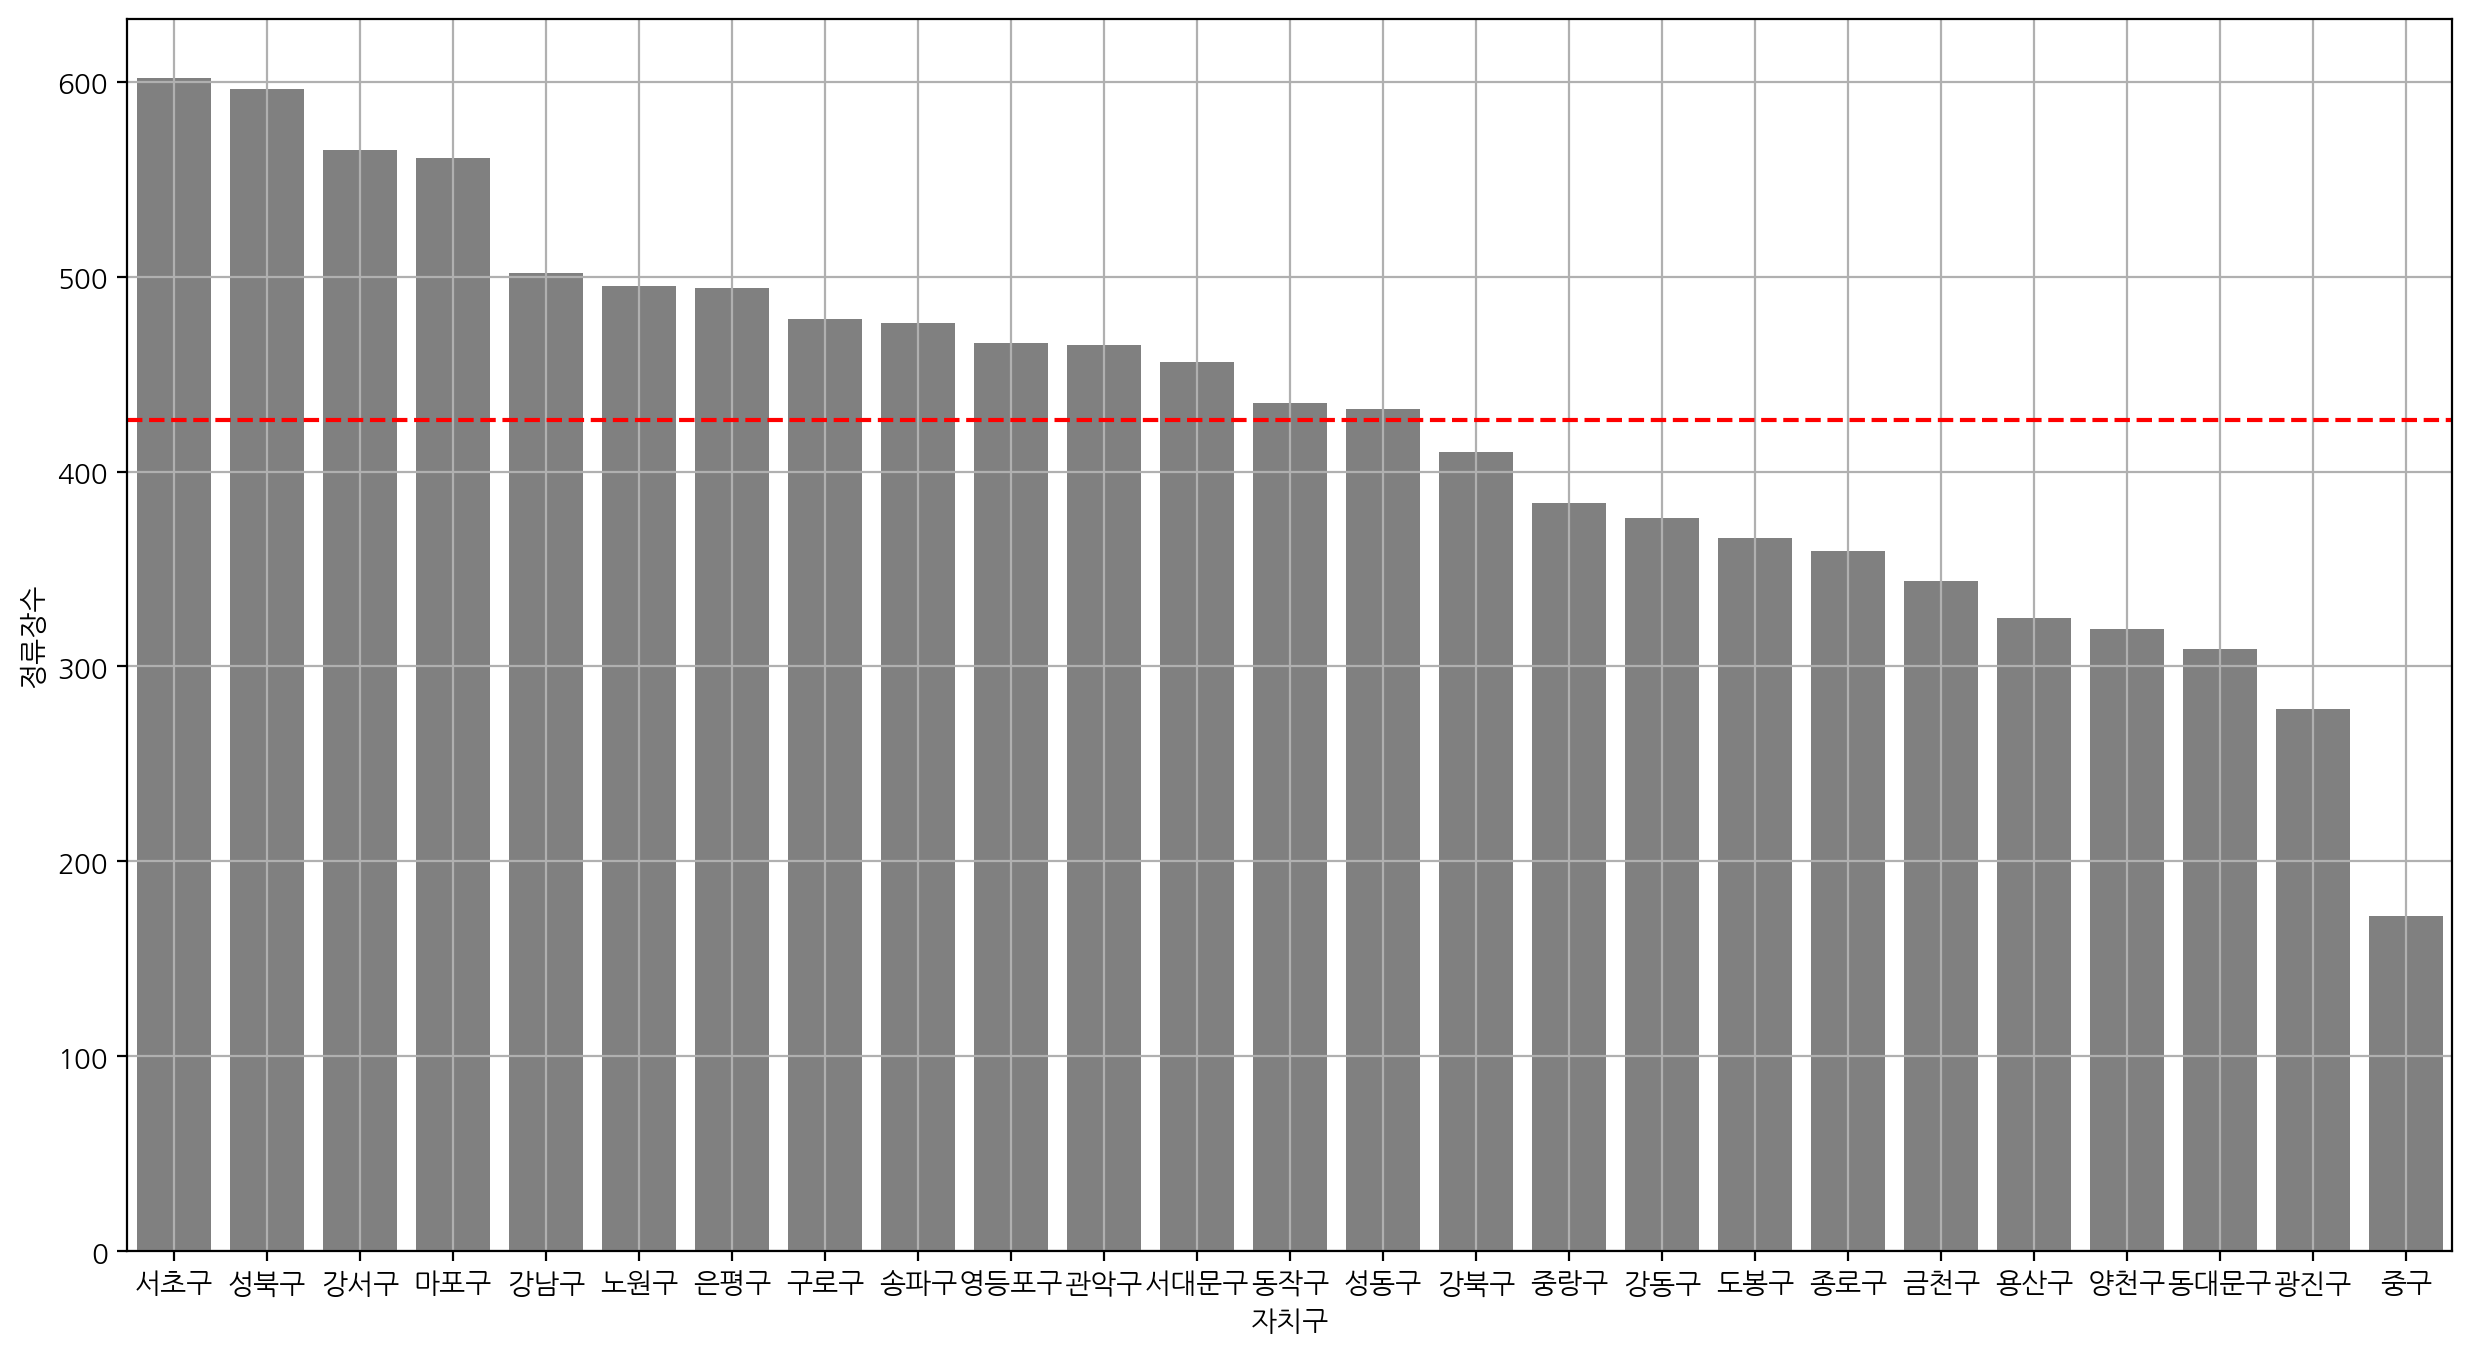

In [37]:
# 주석
one_variable('정류장수')

# 의견: 정류장 수가 가장 많은 구는 서초구, 성북구, 강서구 순이고, 가장 적은 구는 중구, 광진구, 동대문구 순이다.

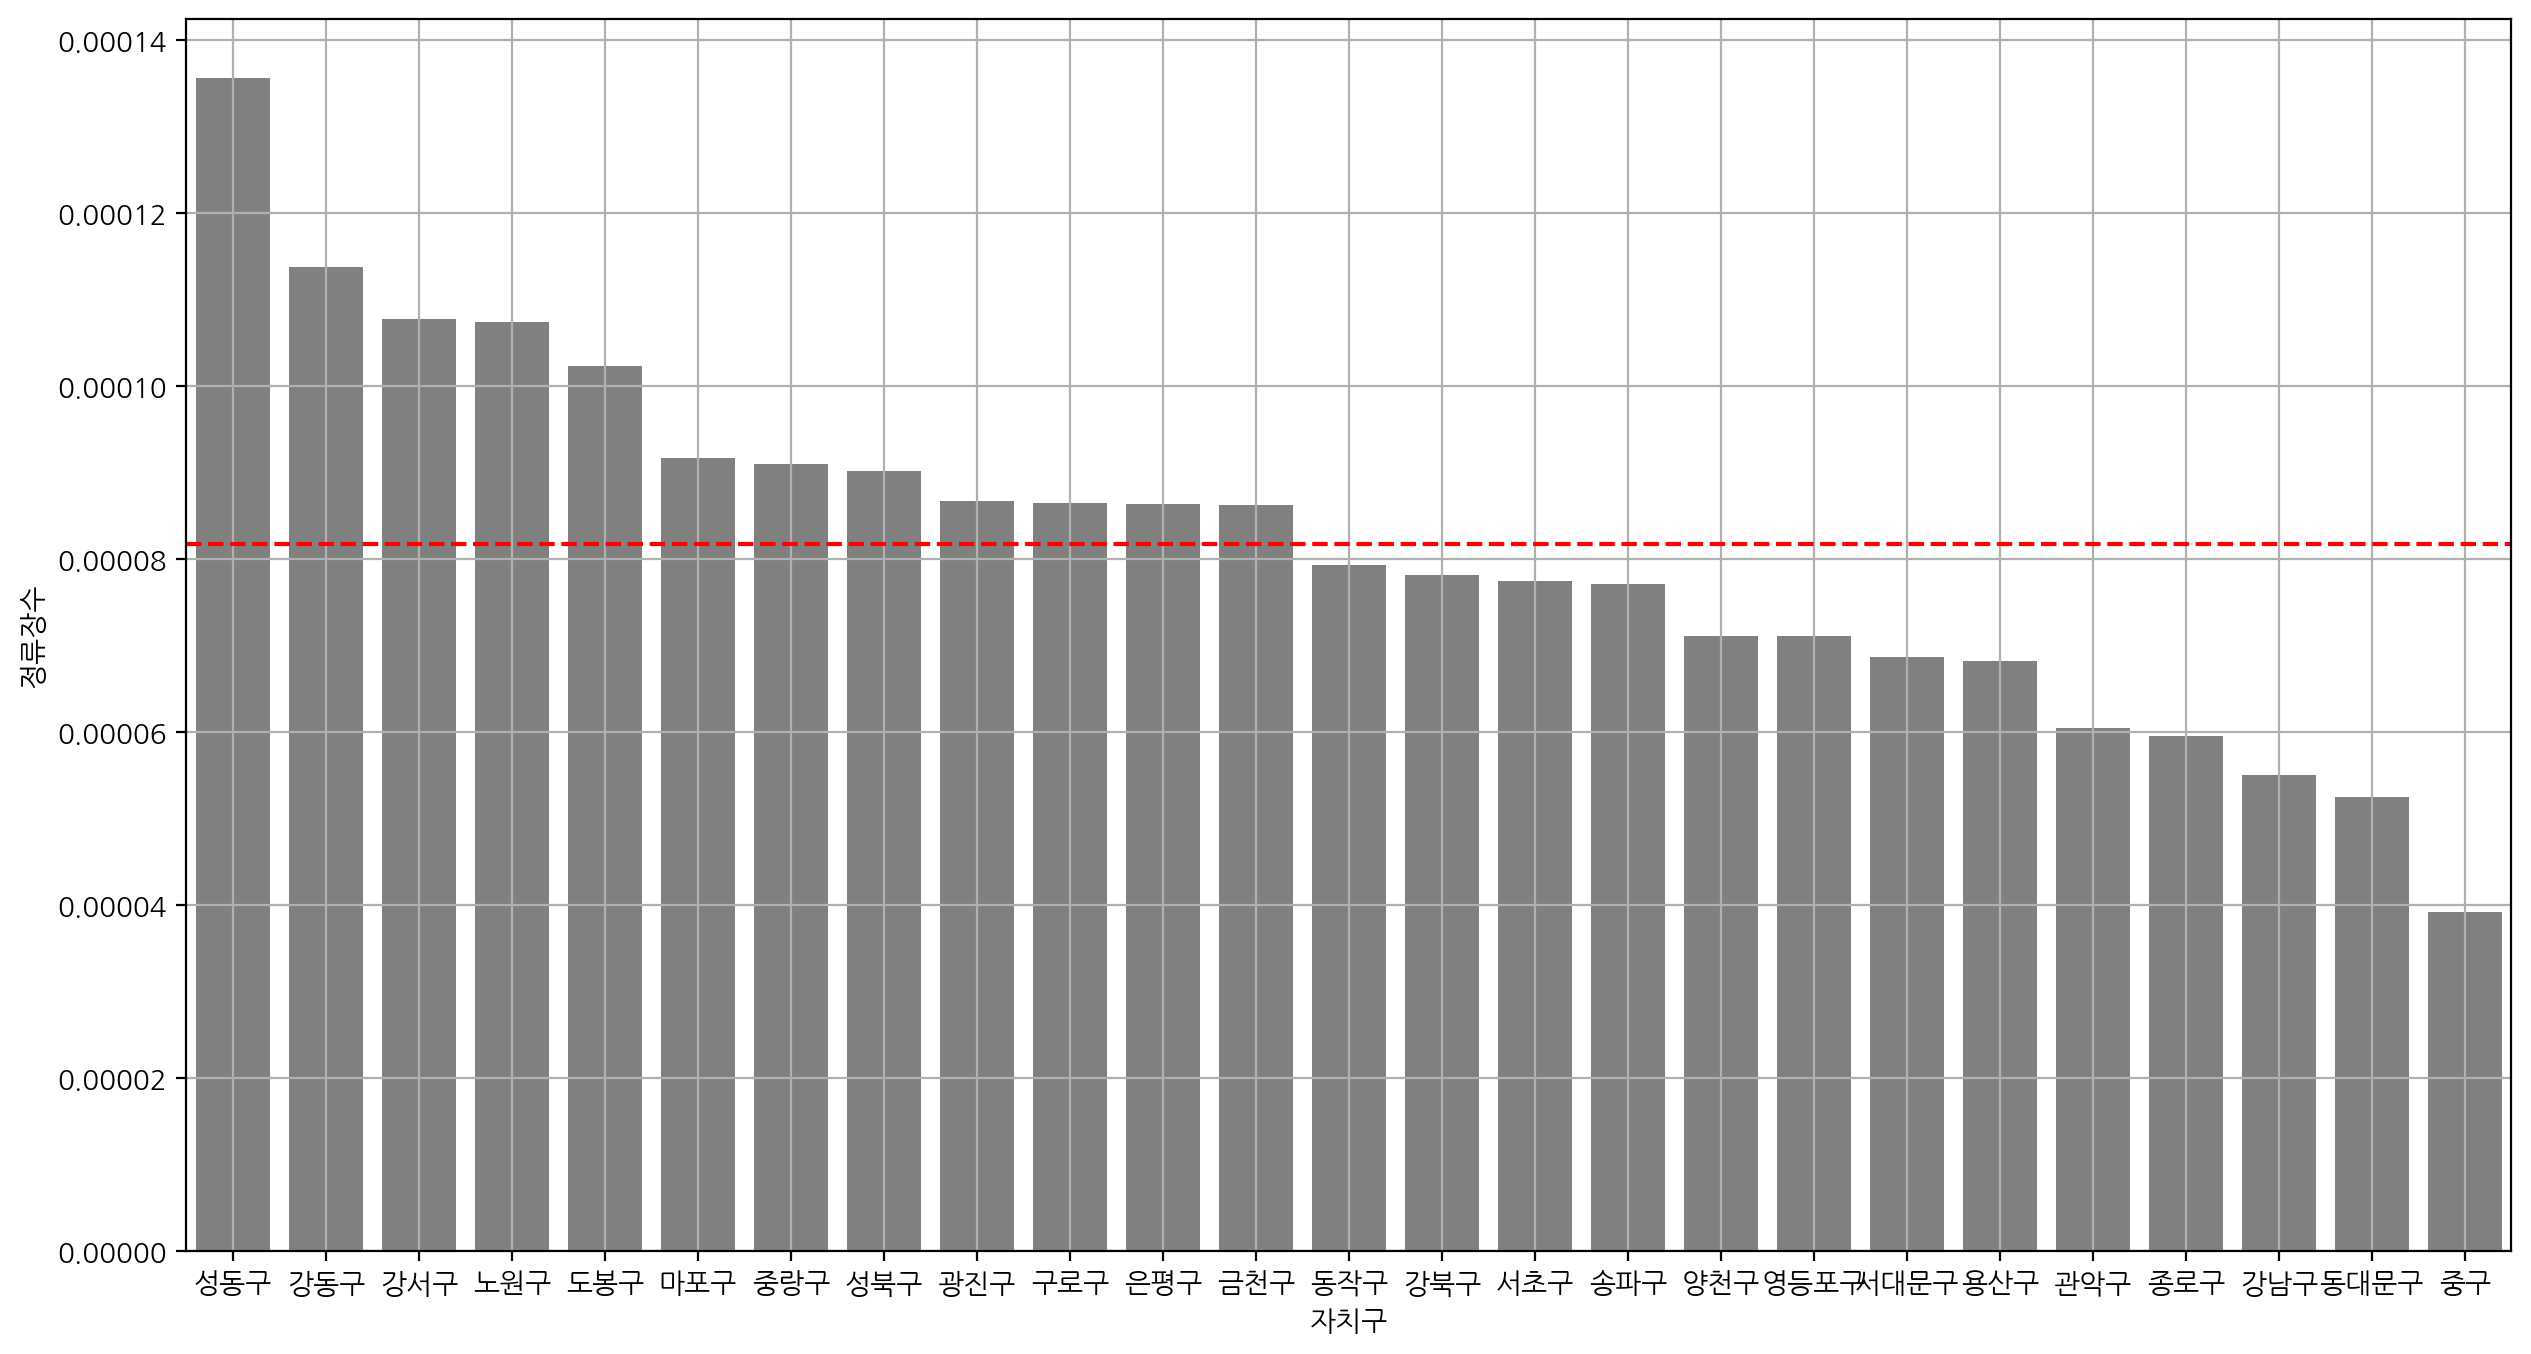

In [81]:
one_variable('정류장수', norm='승차총승객수')

# 승차 총 승객수 대비 정류장 수는 성동구, 강동구, 강서구 순으로 많았고 중구, 동대문구, 강남구 순으로 많았다.

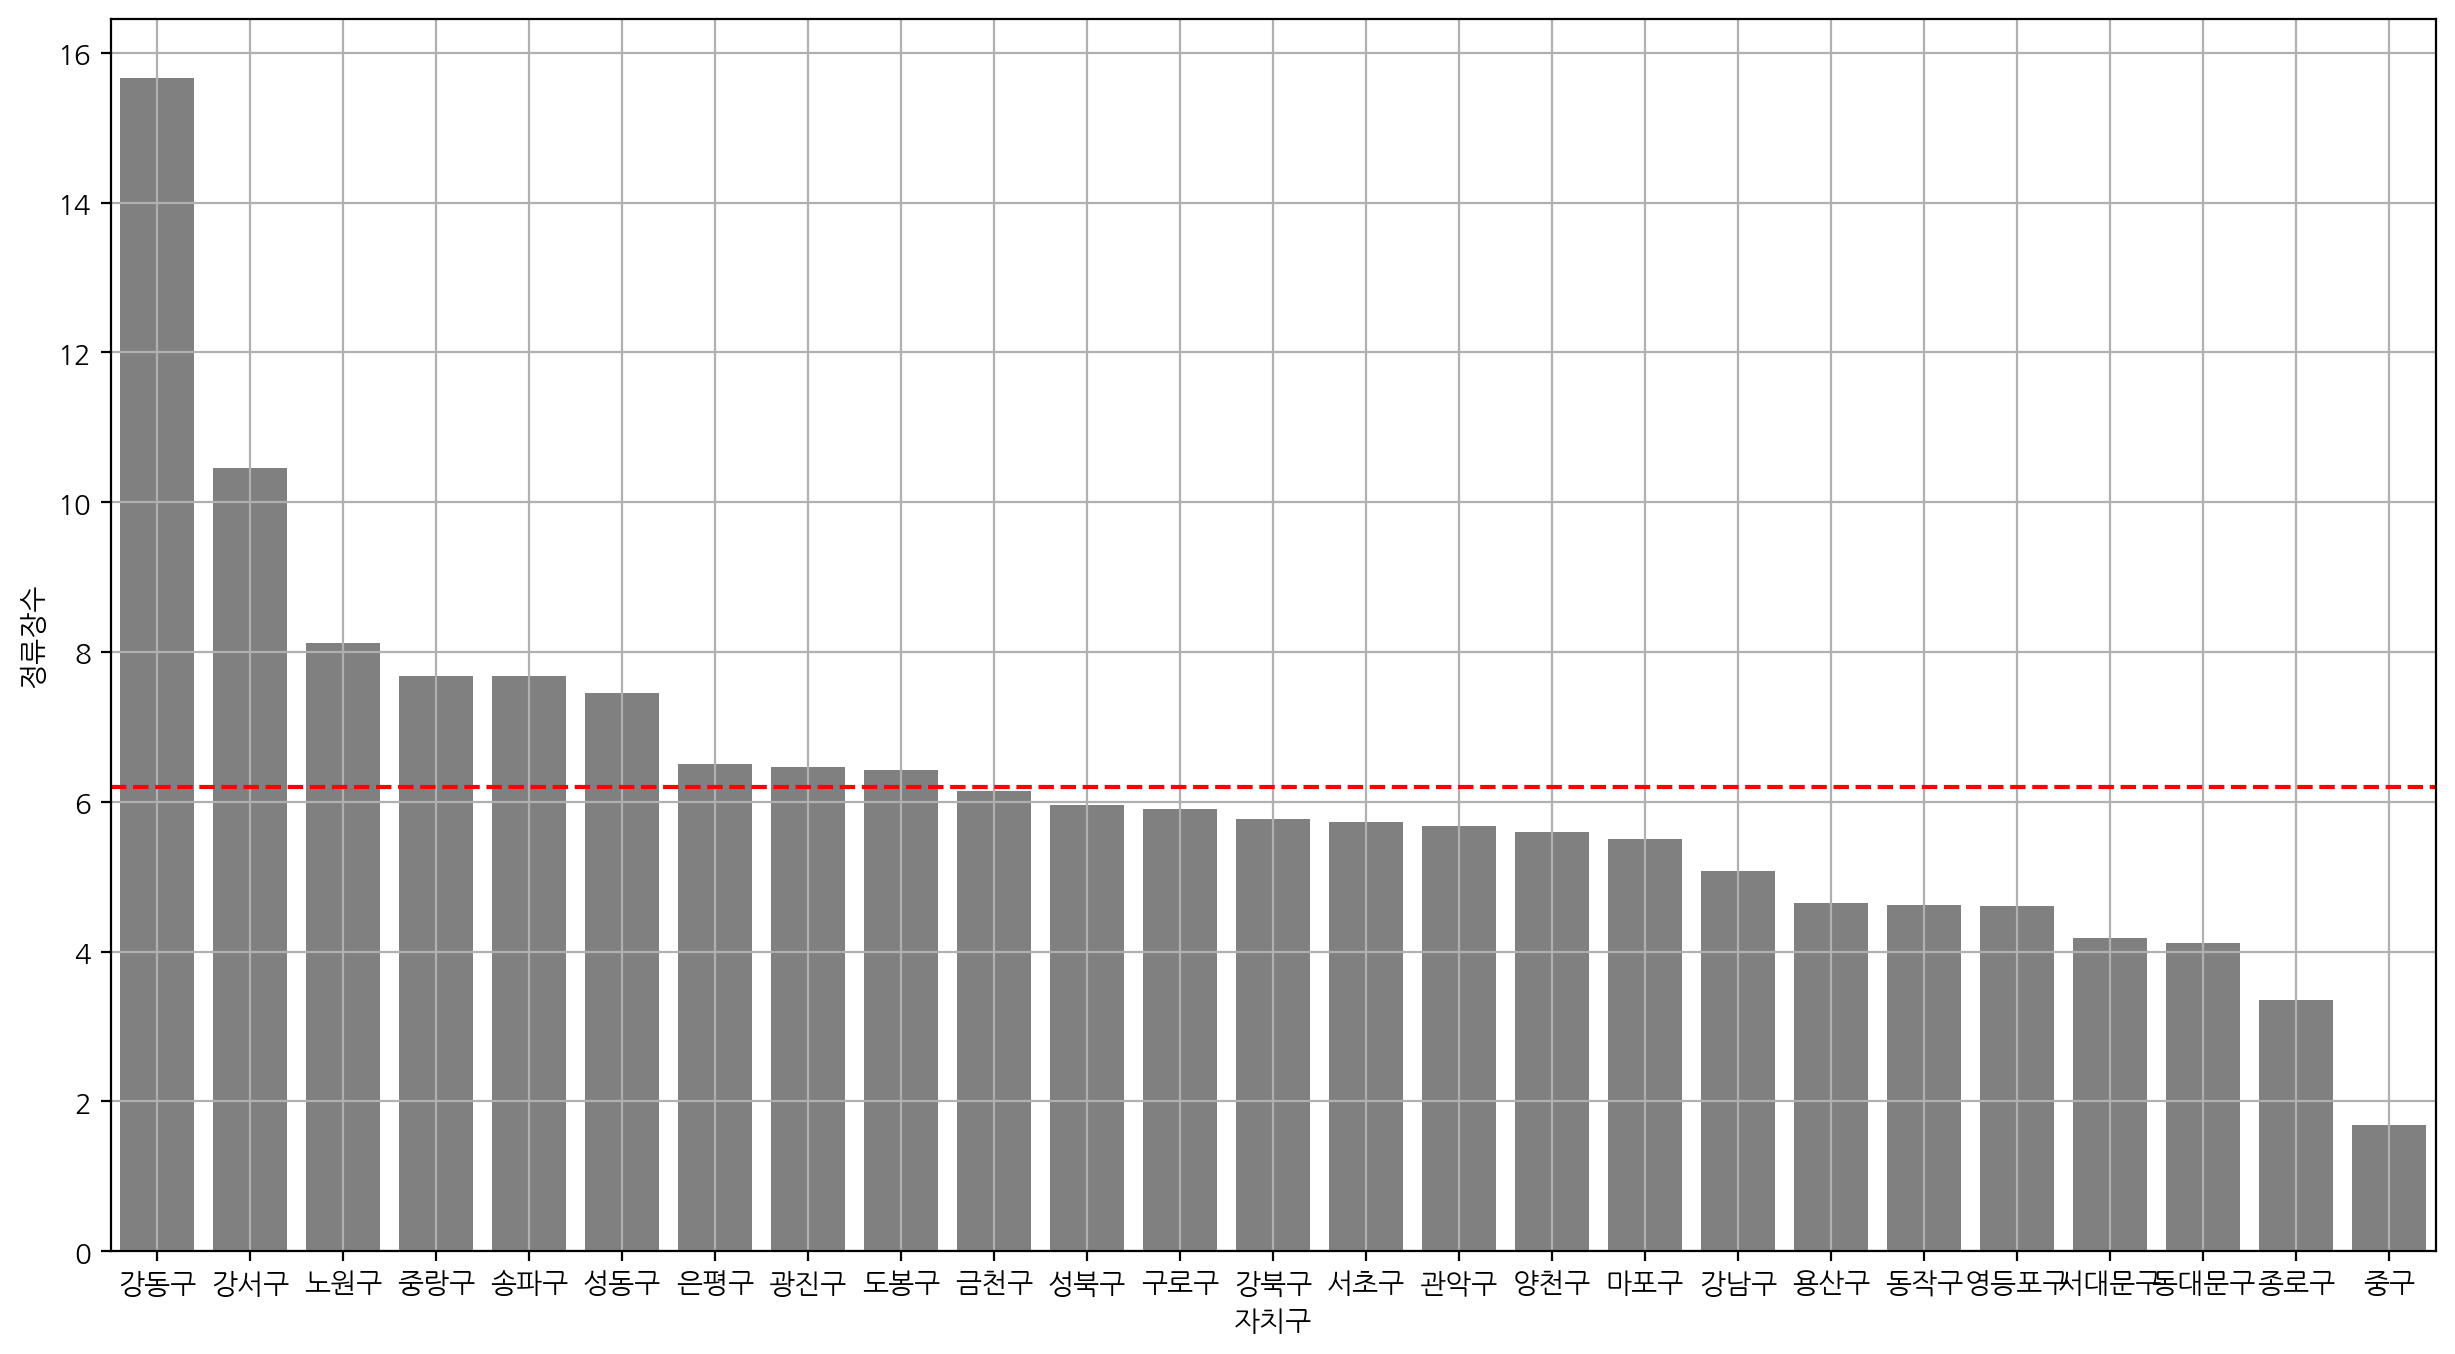

In [82]:
one_variable('정류장수', norm='노선수')

# 노선 수 대비 정류장 수는 강동구, 강서구, 노원구 순으로 많았고 중구, 종로구, 동대문구 순으로 적었다.

### 2) 노선수

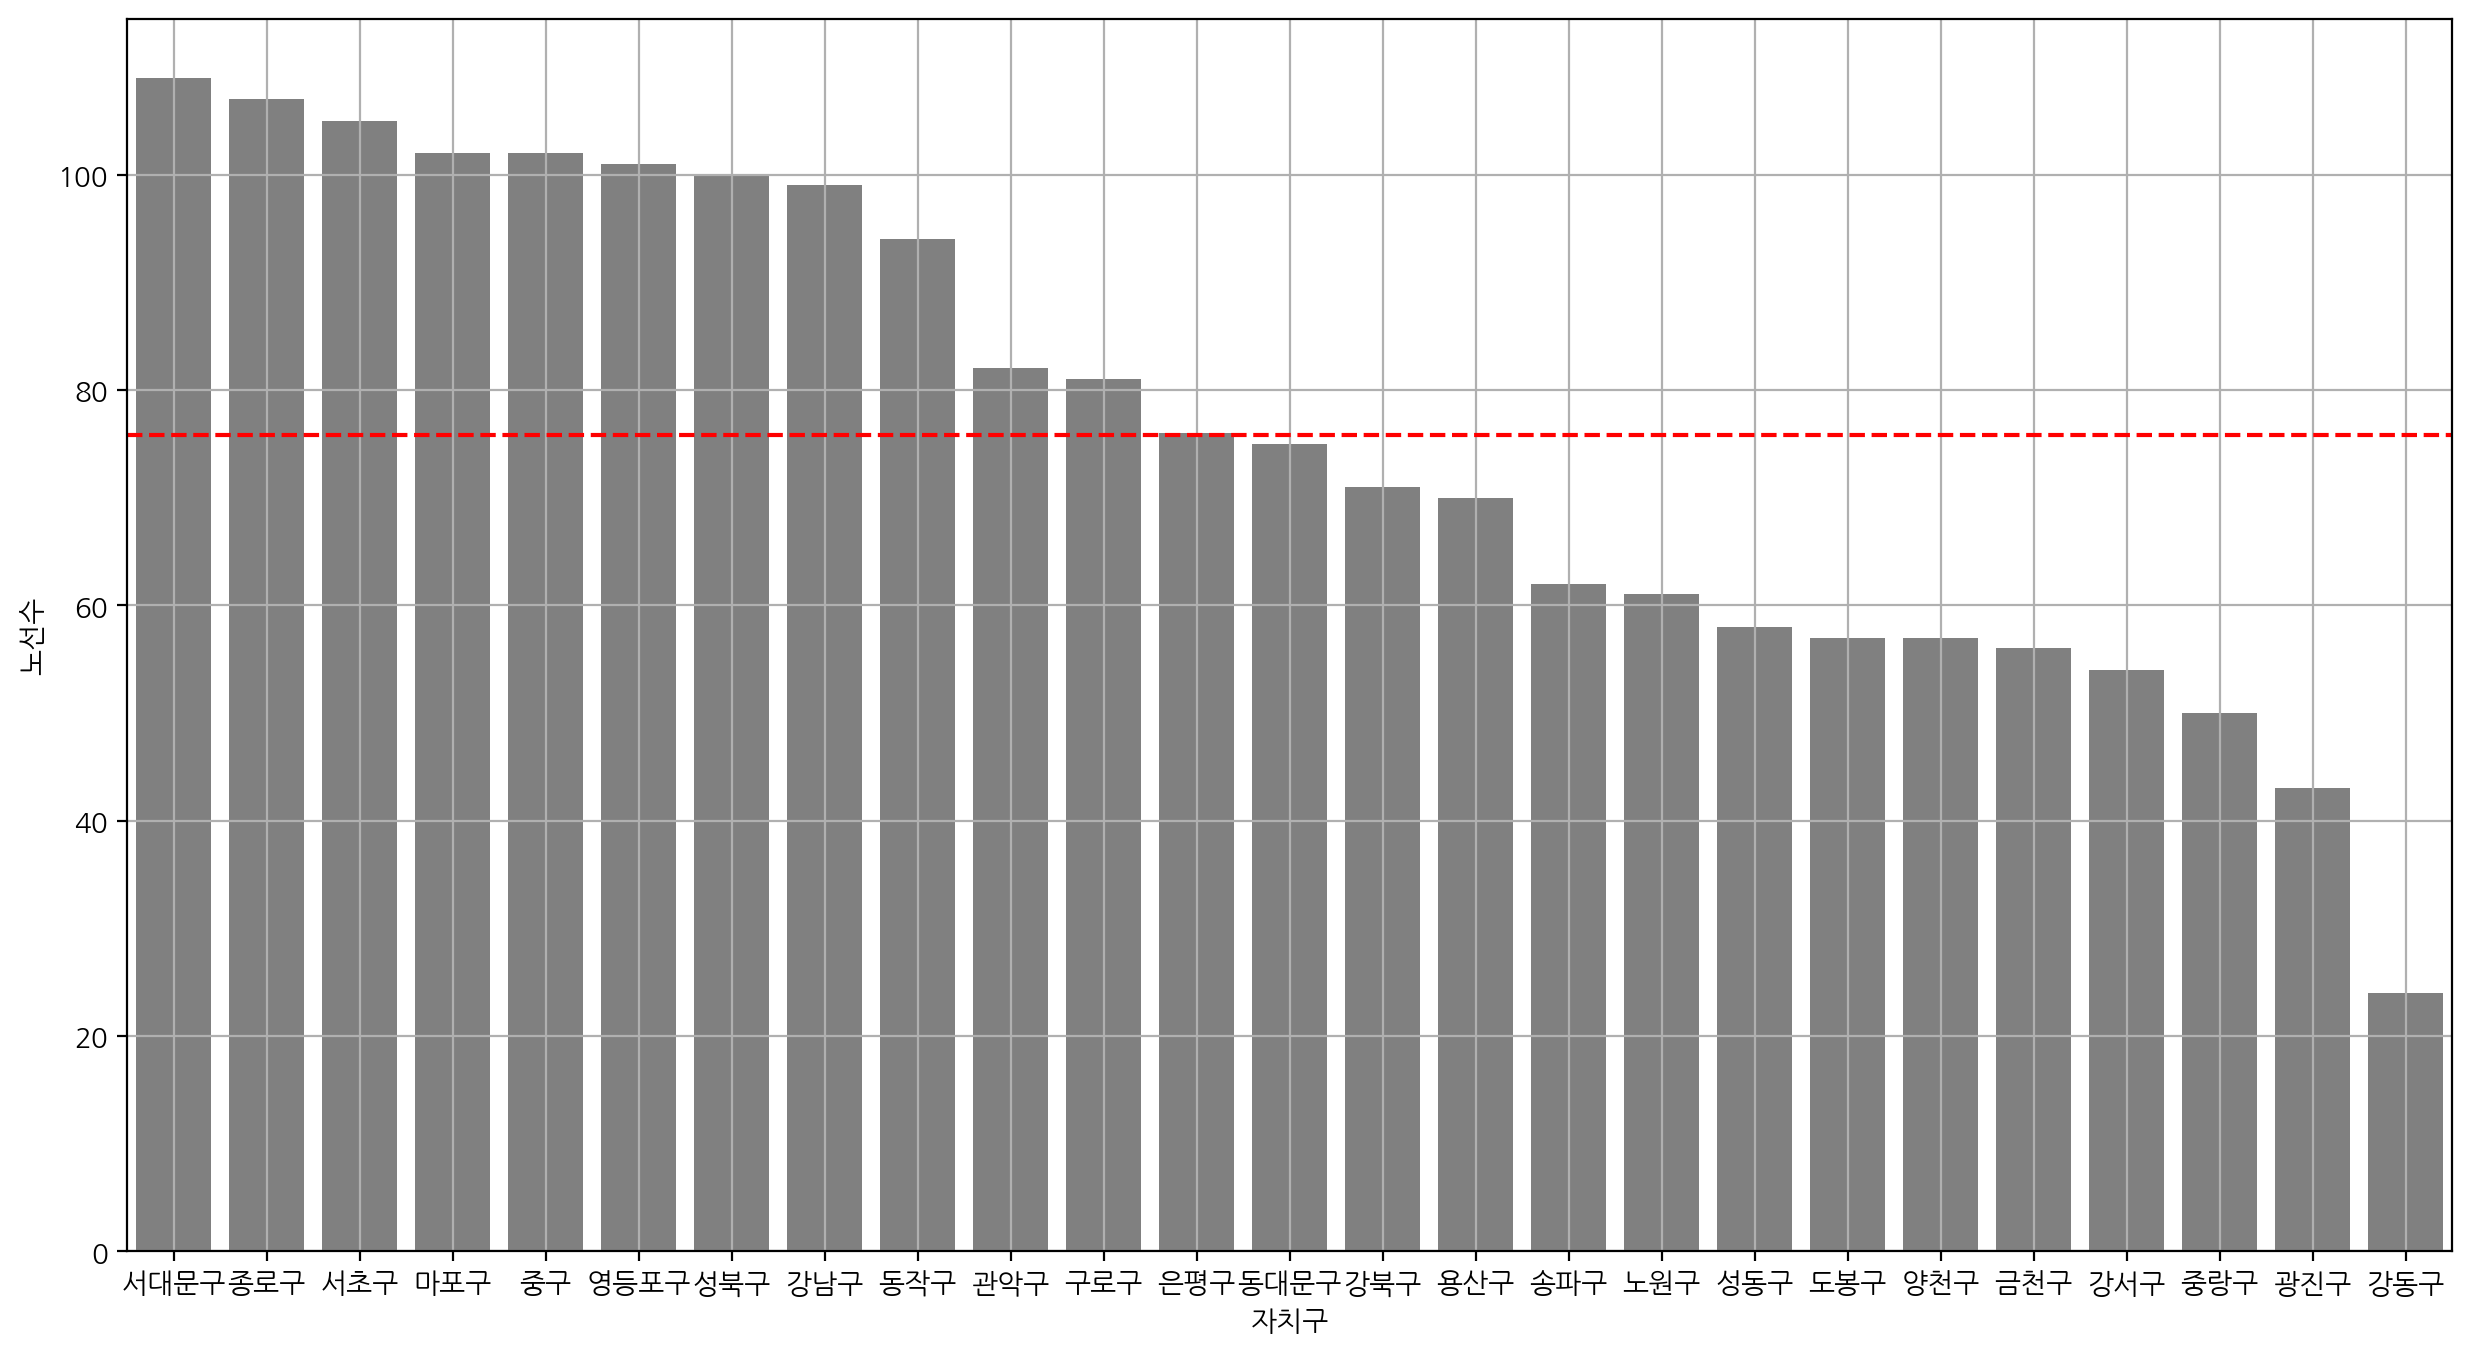

In [83]:
## 주석
col='노선수'
one_variable(col)

# 의견: 버스노선 수가 가장 많은 구는 서대문구, 종로구, 서초구 순이고 강동구, 광진구, 중랑구 순이다.

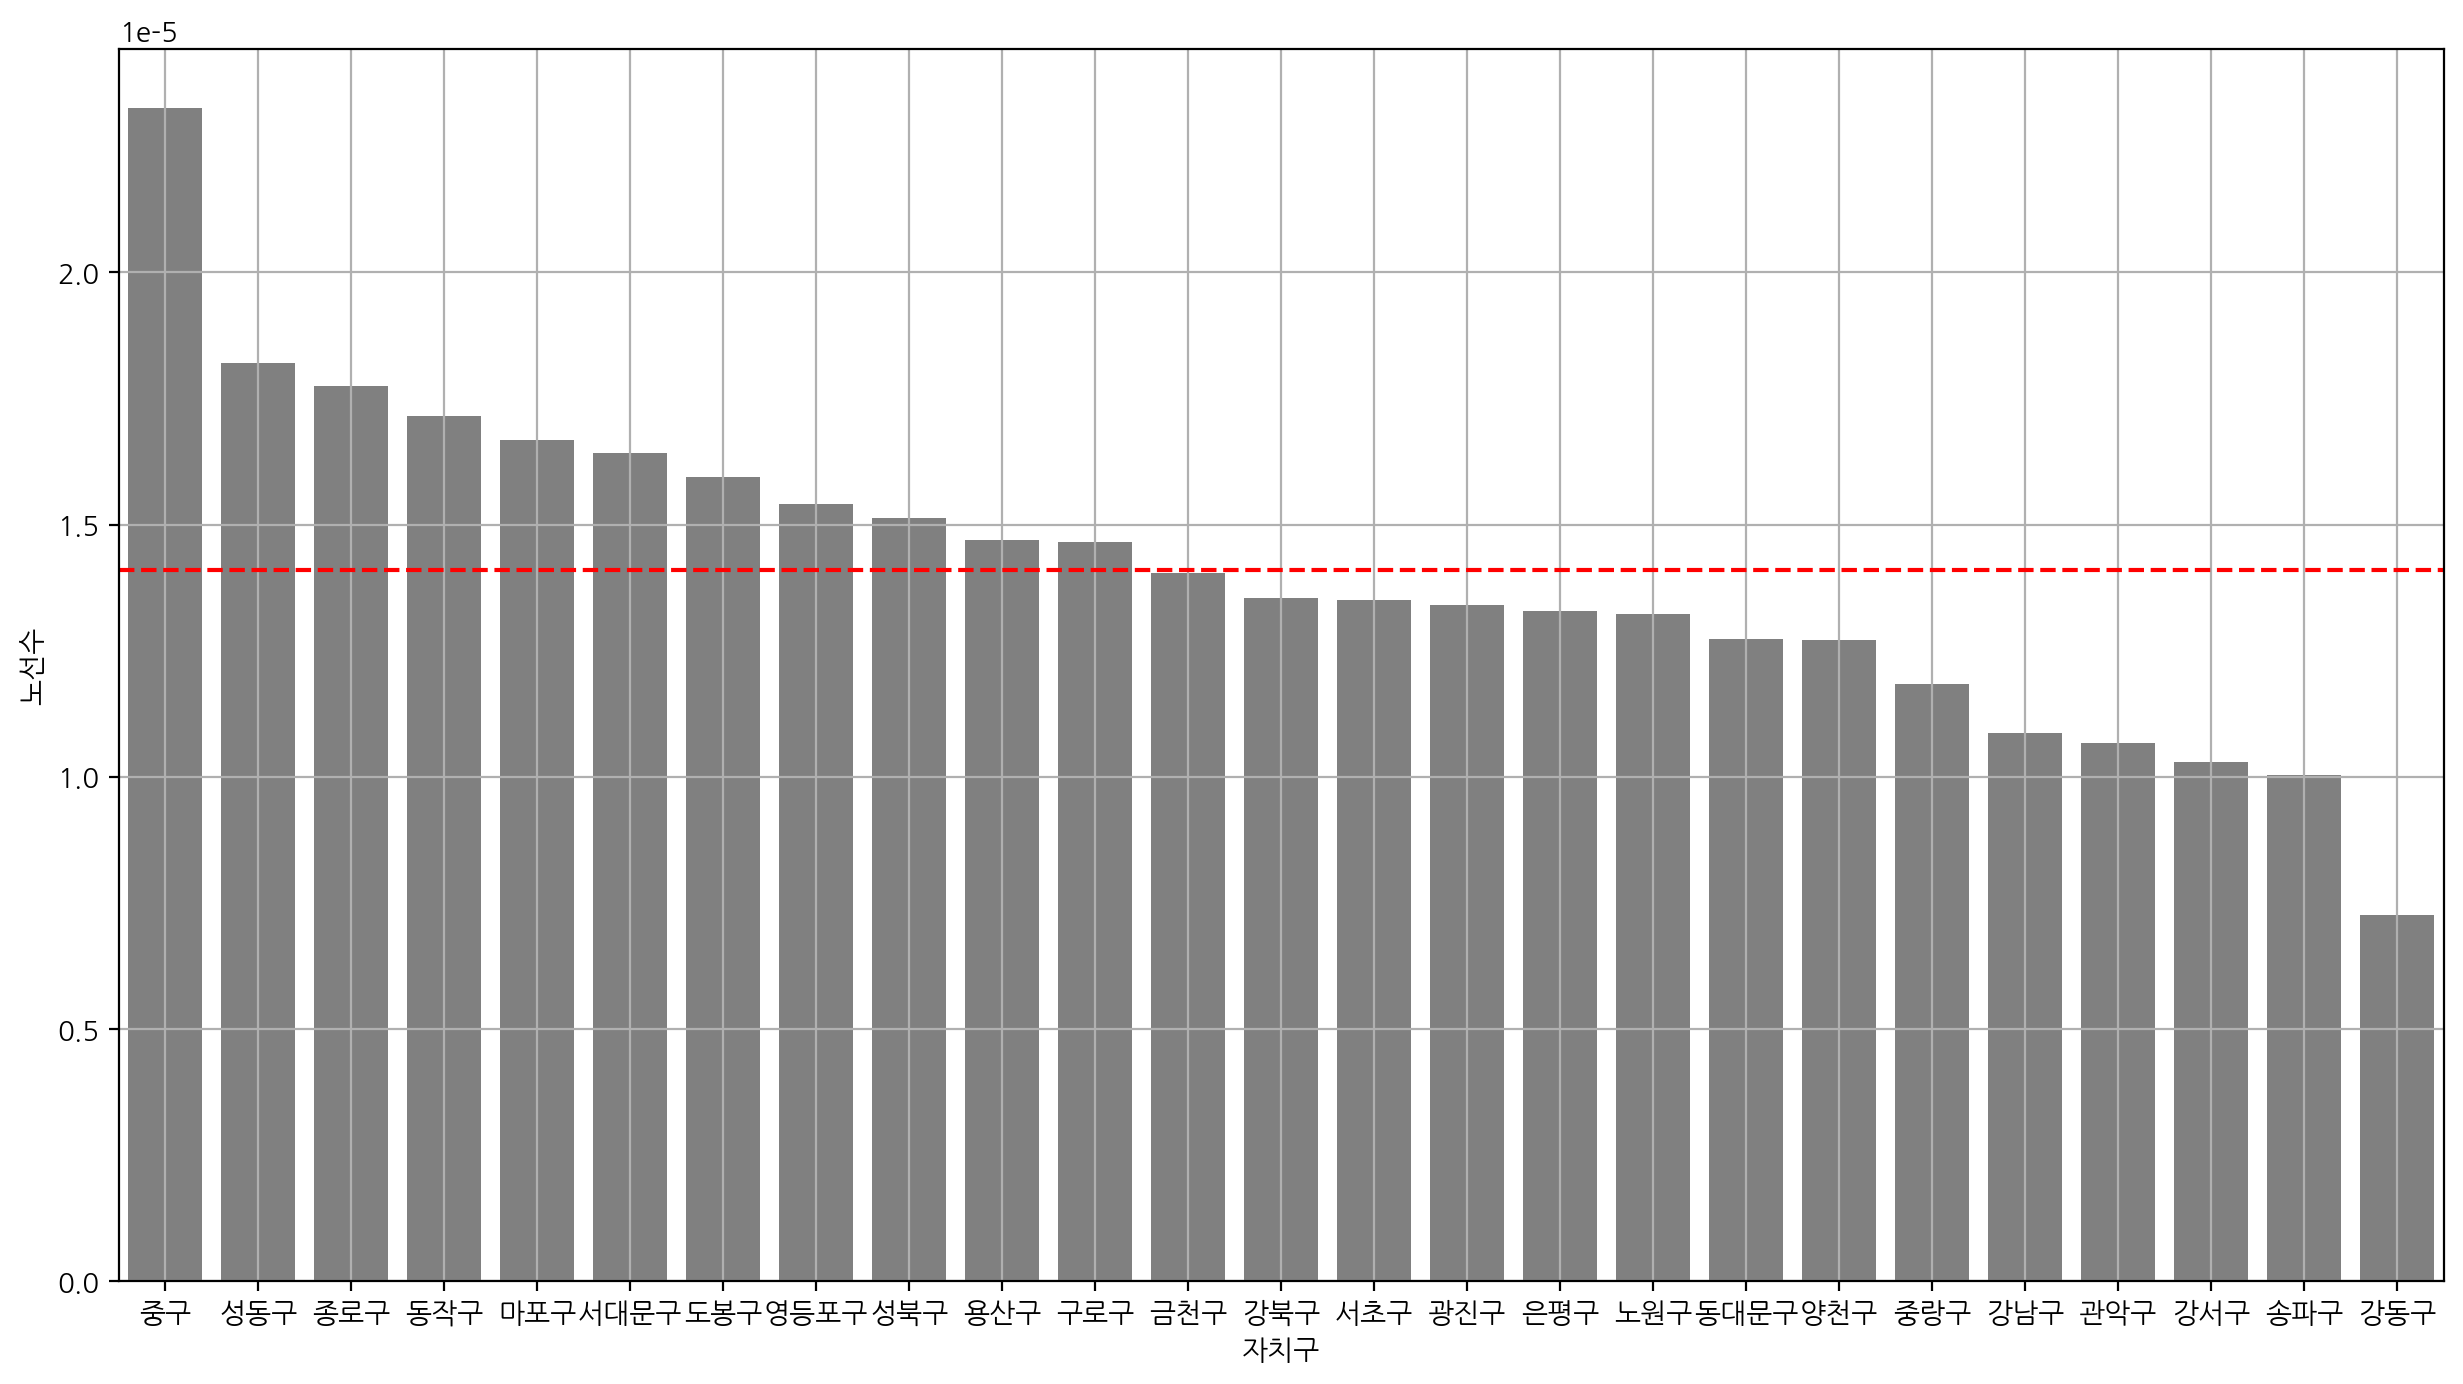

In [84]:
one_variable(col, norm='승차총승객수')

# 승차 총 승객수 대비 노선 수가 가장 많은 구는 중구, 성동구, 종로구 순이고 강동구, 송파구, 강서구 순으로 적었다.

### 3) 평균 이동 시간(분)

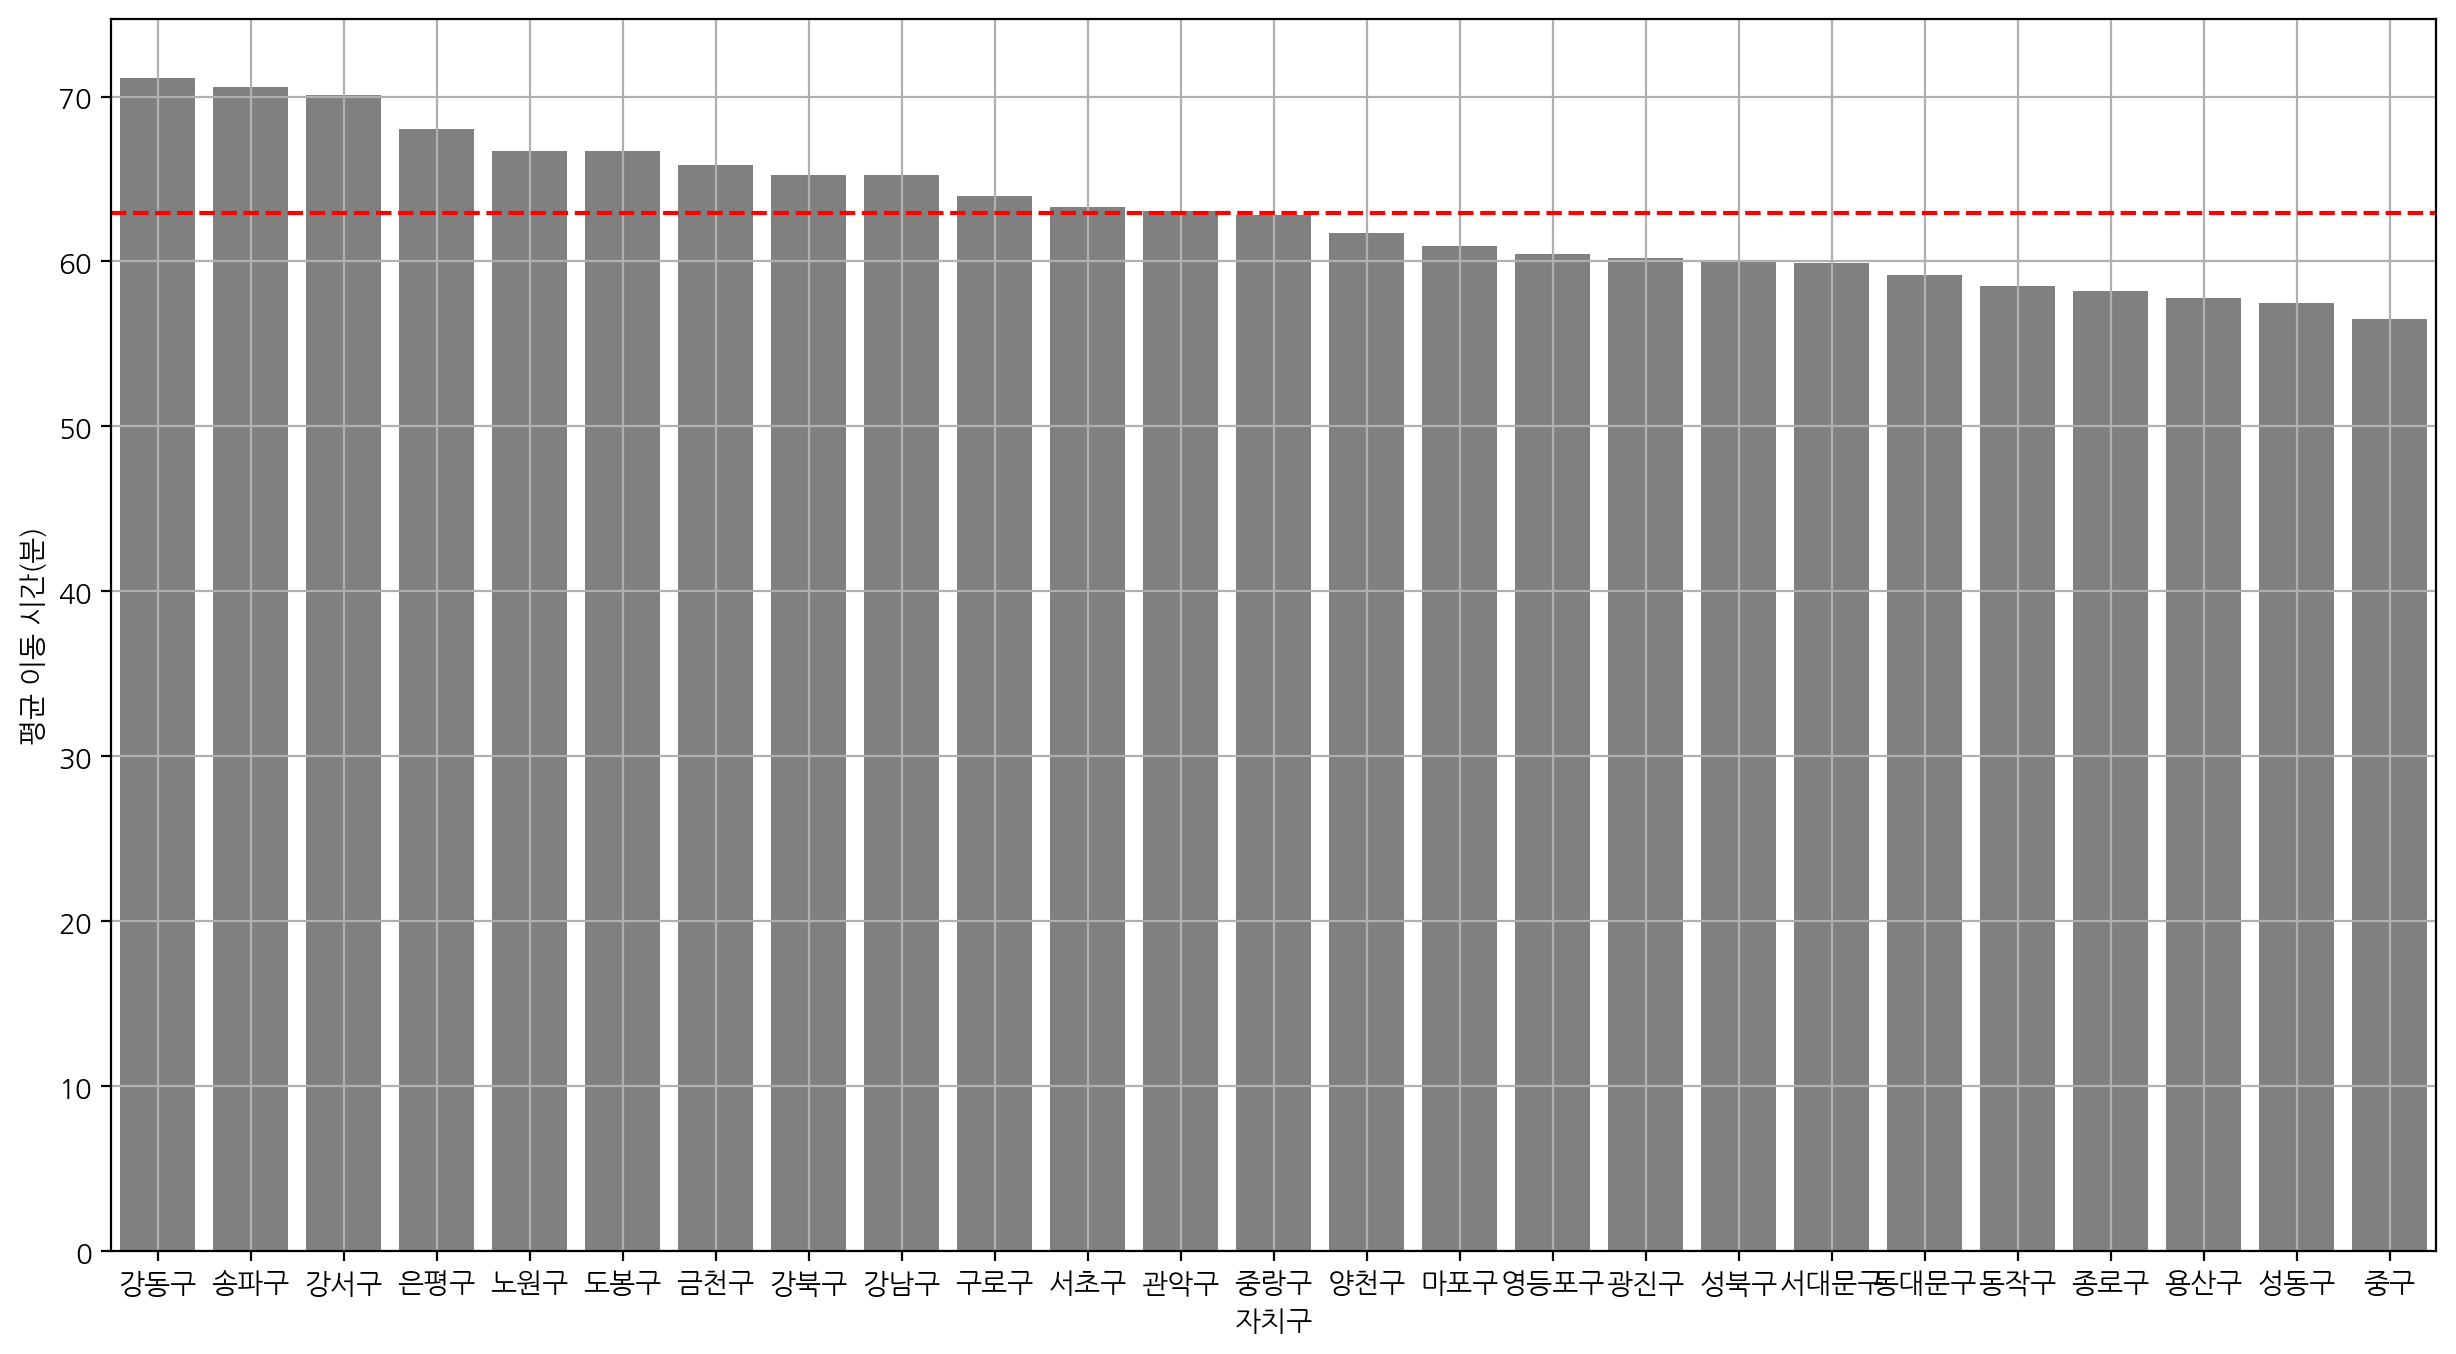

In [85]:
# 주석
col = '평균 이동 시간(분)'
one_variable(col)

# 의견: 평균 이동 시간이 가장 많은 구는 강동구, 송파구, 강서구 순이고 가장 적은 구는 중구, 성동구, 용산구 순이다.

### 4) 이동인구(합)

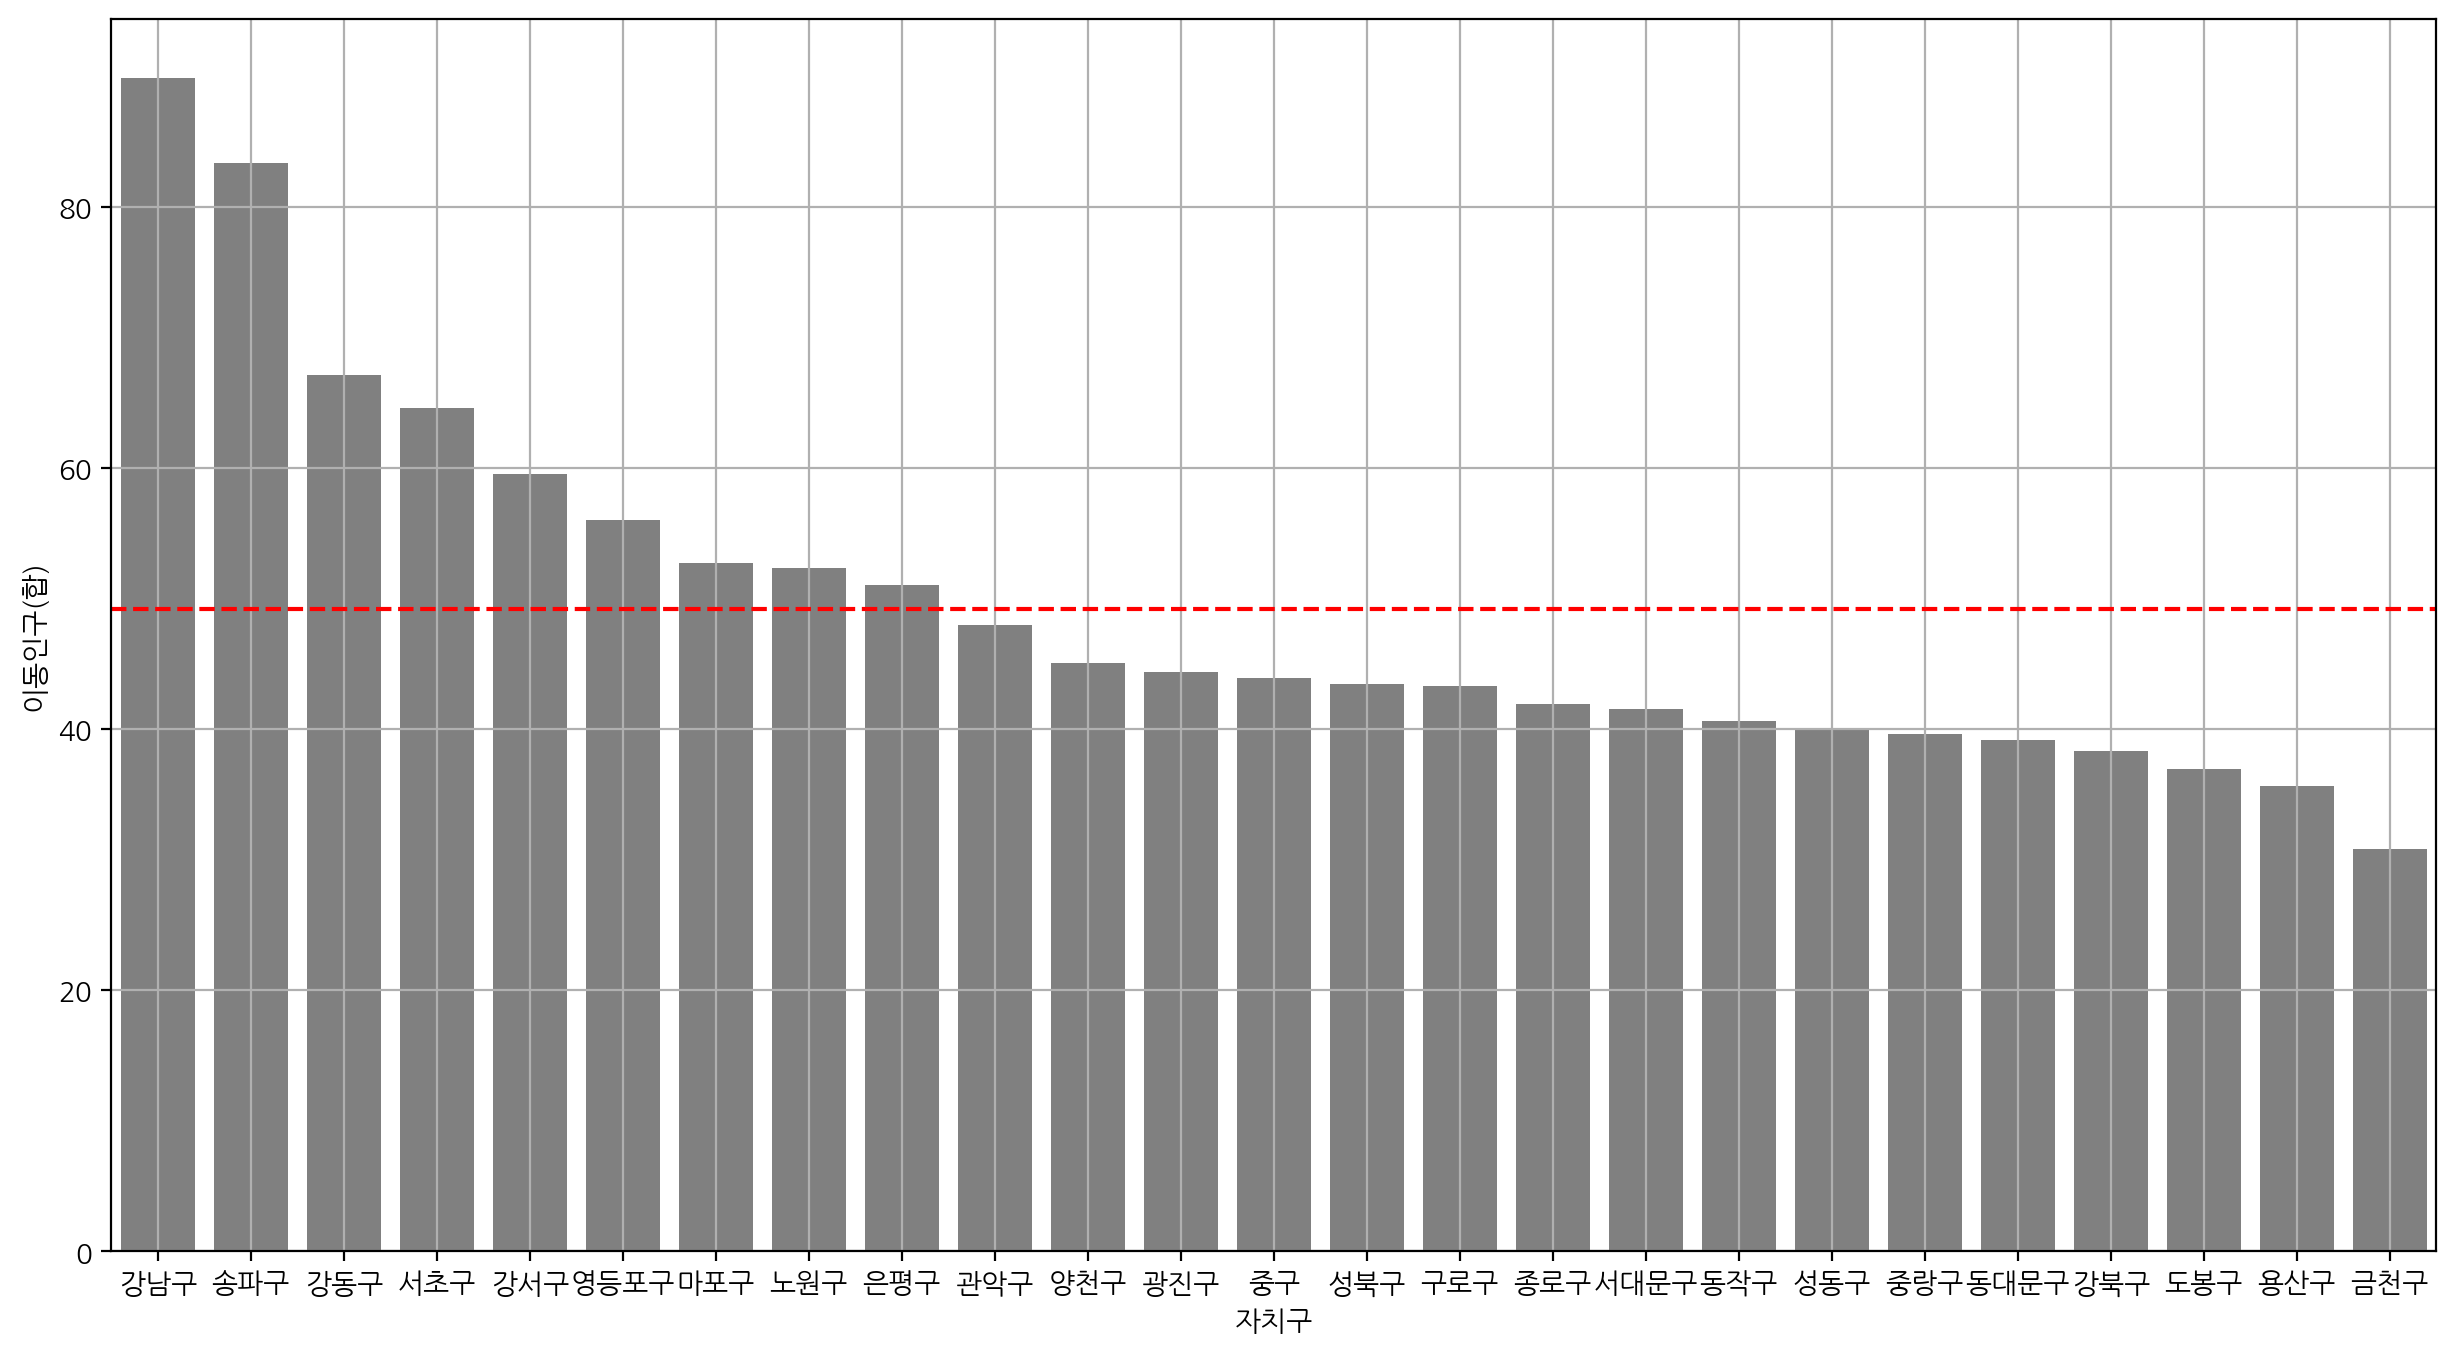

In [86]:
# 주석
col = '이동인구(합)'
one_variable(col)

# 의견: 해당 구로 도착한 승객이 가장 많은 구는 강남구, 송파구, 강동구 순이고 가장 적은 구는 금천구, 용산구, 도봉구 순이다.
# 해당 구로 도착할 사람들이 가장 많은 곳 (기대탑승객)

### 5) 합계 인구

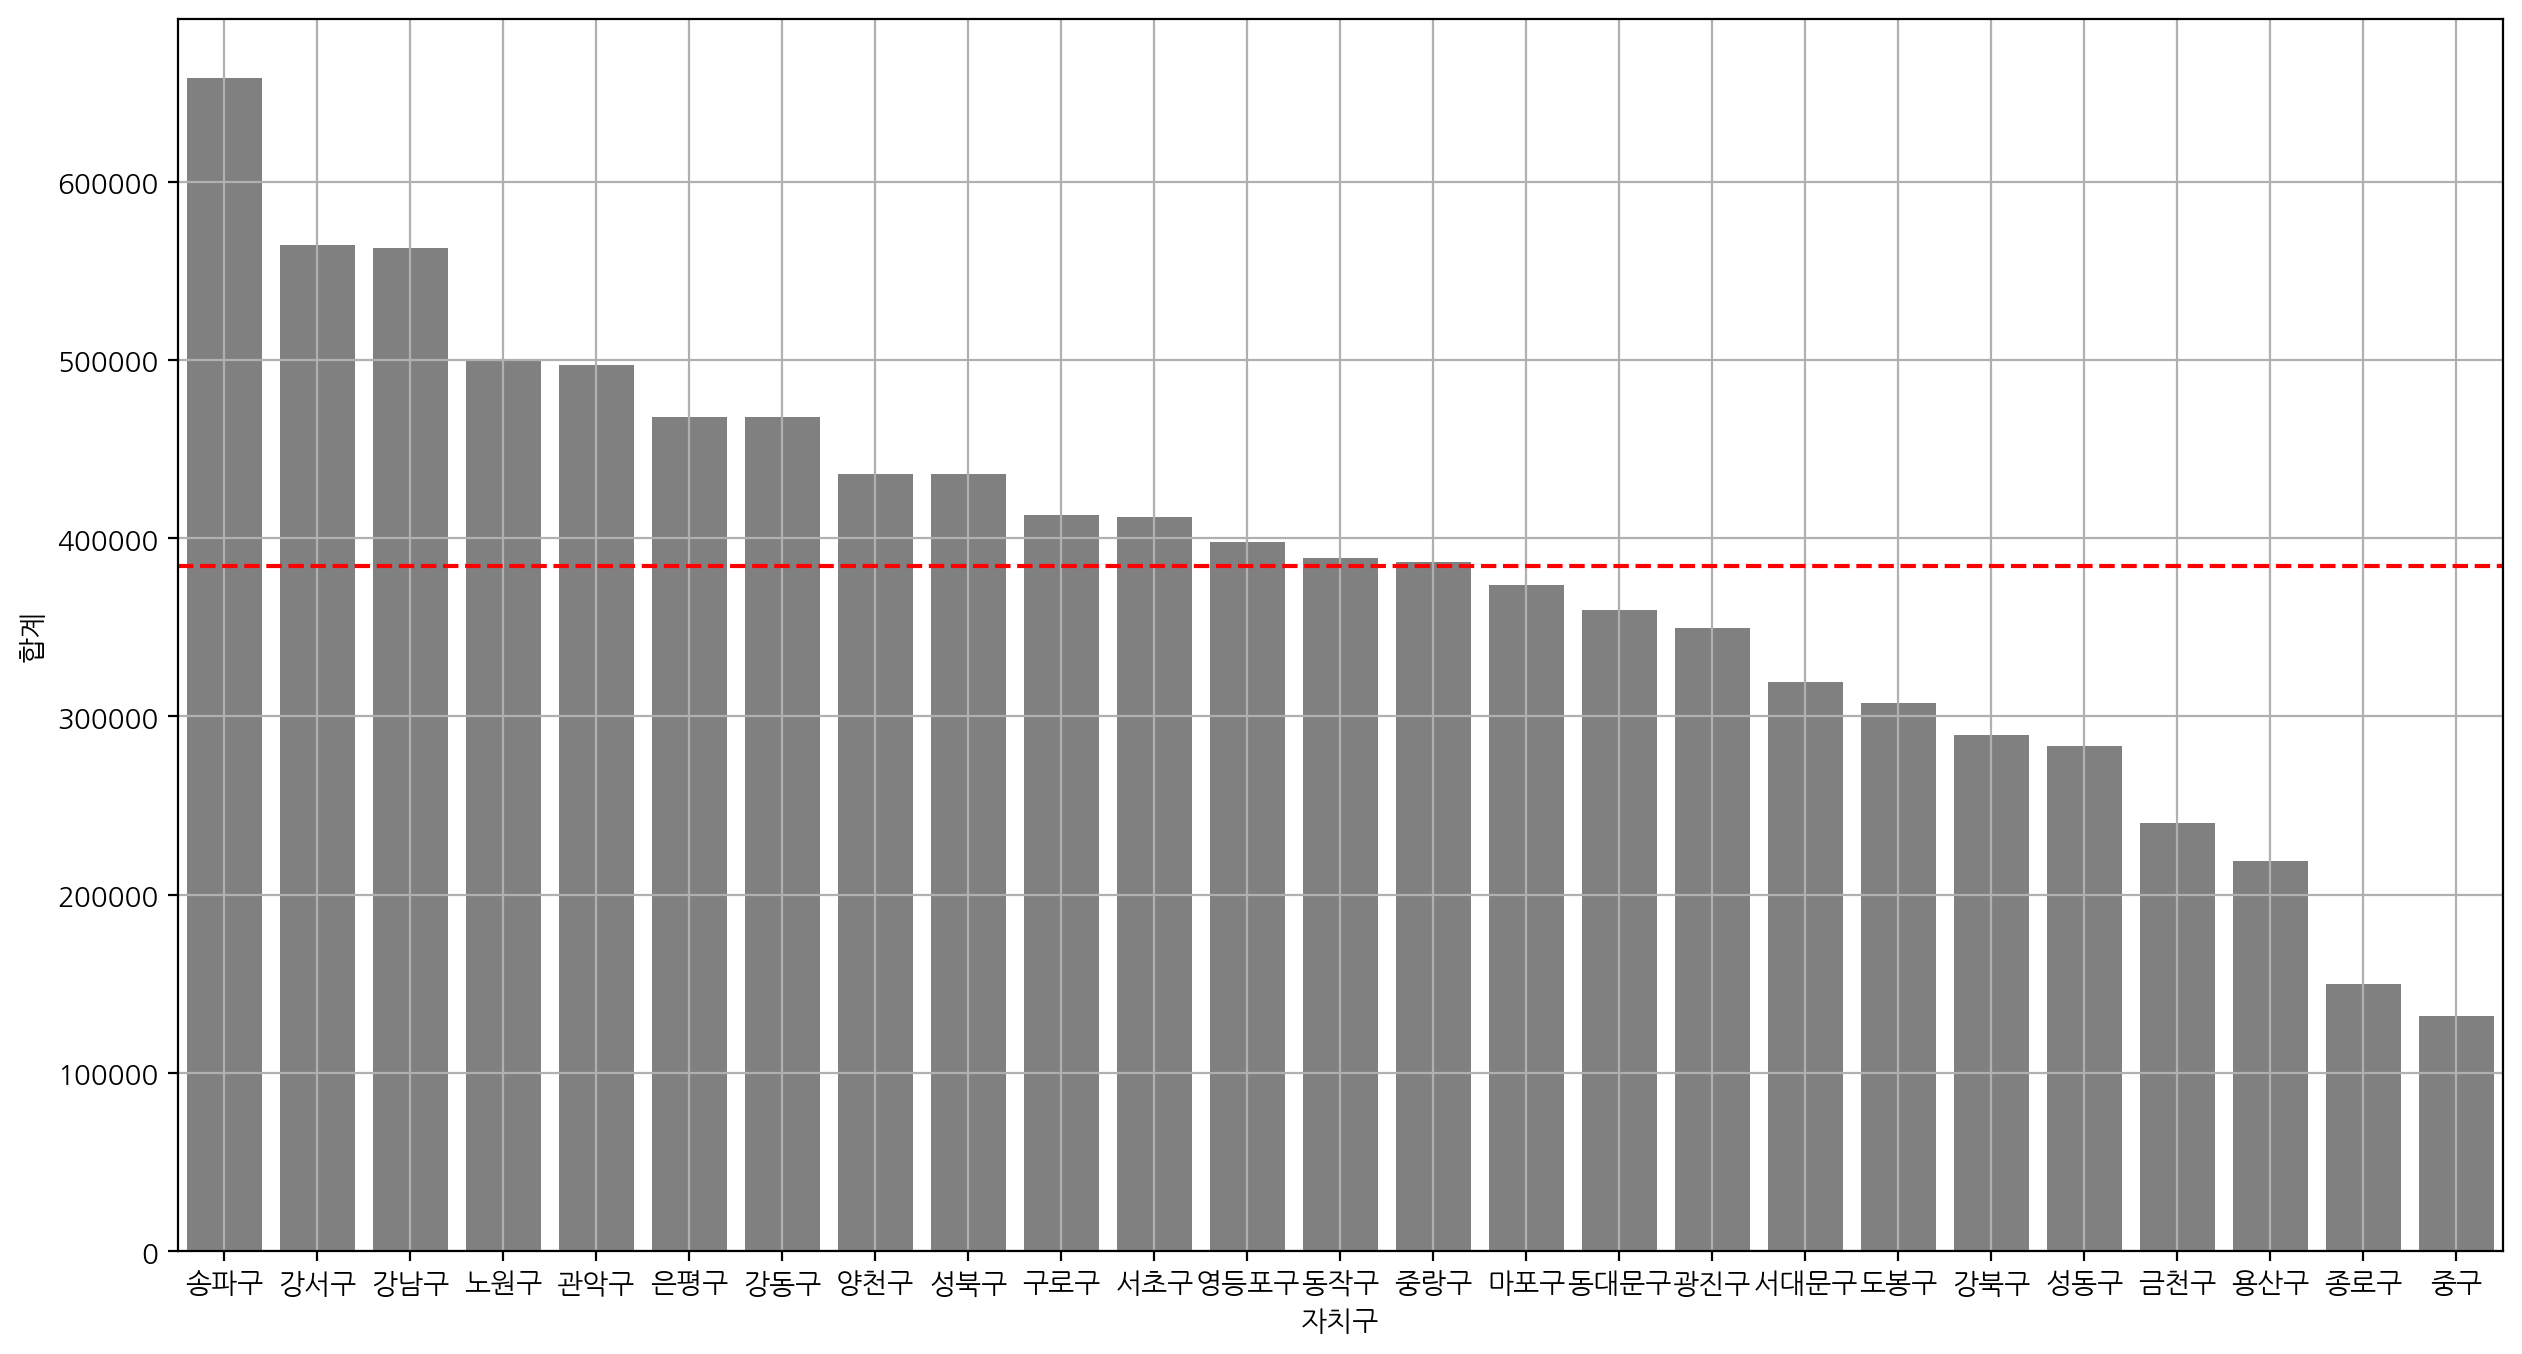

In [87]:
# 주석
col = '합계'
one_variable(col)

# 의견: 총 인구 수가 가장 많은 곳은 송파구, 강서구, 강남구 순이고 가장 적은 곳은 중구, 종로구, 용산구 순이다.

# 5.이변량 분석

- 자료 종류에 맞게 $X \rightarrow Y$ 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가하세요.
- 가설 검정 시 다음 항목을 참조하여 수행하세요.
    - 유의수준: 5%
    - 숫자 → 숫자: 상관분석
    - 범주 → 범주: 카이제곱검정
    - 범주 → 숫자: t검정, 분산분석
    - 숫자 → 범주: 로지스틱 회귀모형을 통해, 회귀계수의 p-value로 검정을 수행합니다.

### 상관계수 (우리가 배운 기준)

- 0.5 ~ 1: 강한
- 0.2 ~ 0.5: 중간
- 0.1 ~ 0.2: 약간
- 0 ~ 0.1: 없음
- 음수 똑같음 

### p-value 기준: 0.05 (5%)

- p-value가 0.05보다 크다 => 귀무가설을 기각 하지 못한다 => 대립가설(우리가 원하는 바)이 틀렸다
- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함

### 1) 가설 1 노선수 대비 승하차이용객수, 정류장 수가 많다면 노선이 필요한 곳일 것이다.

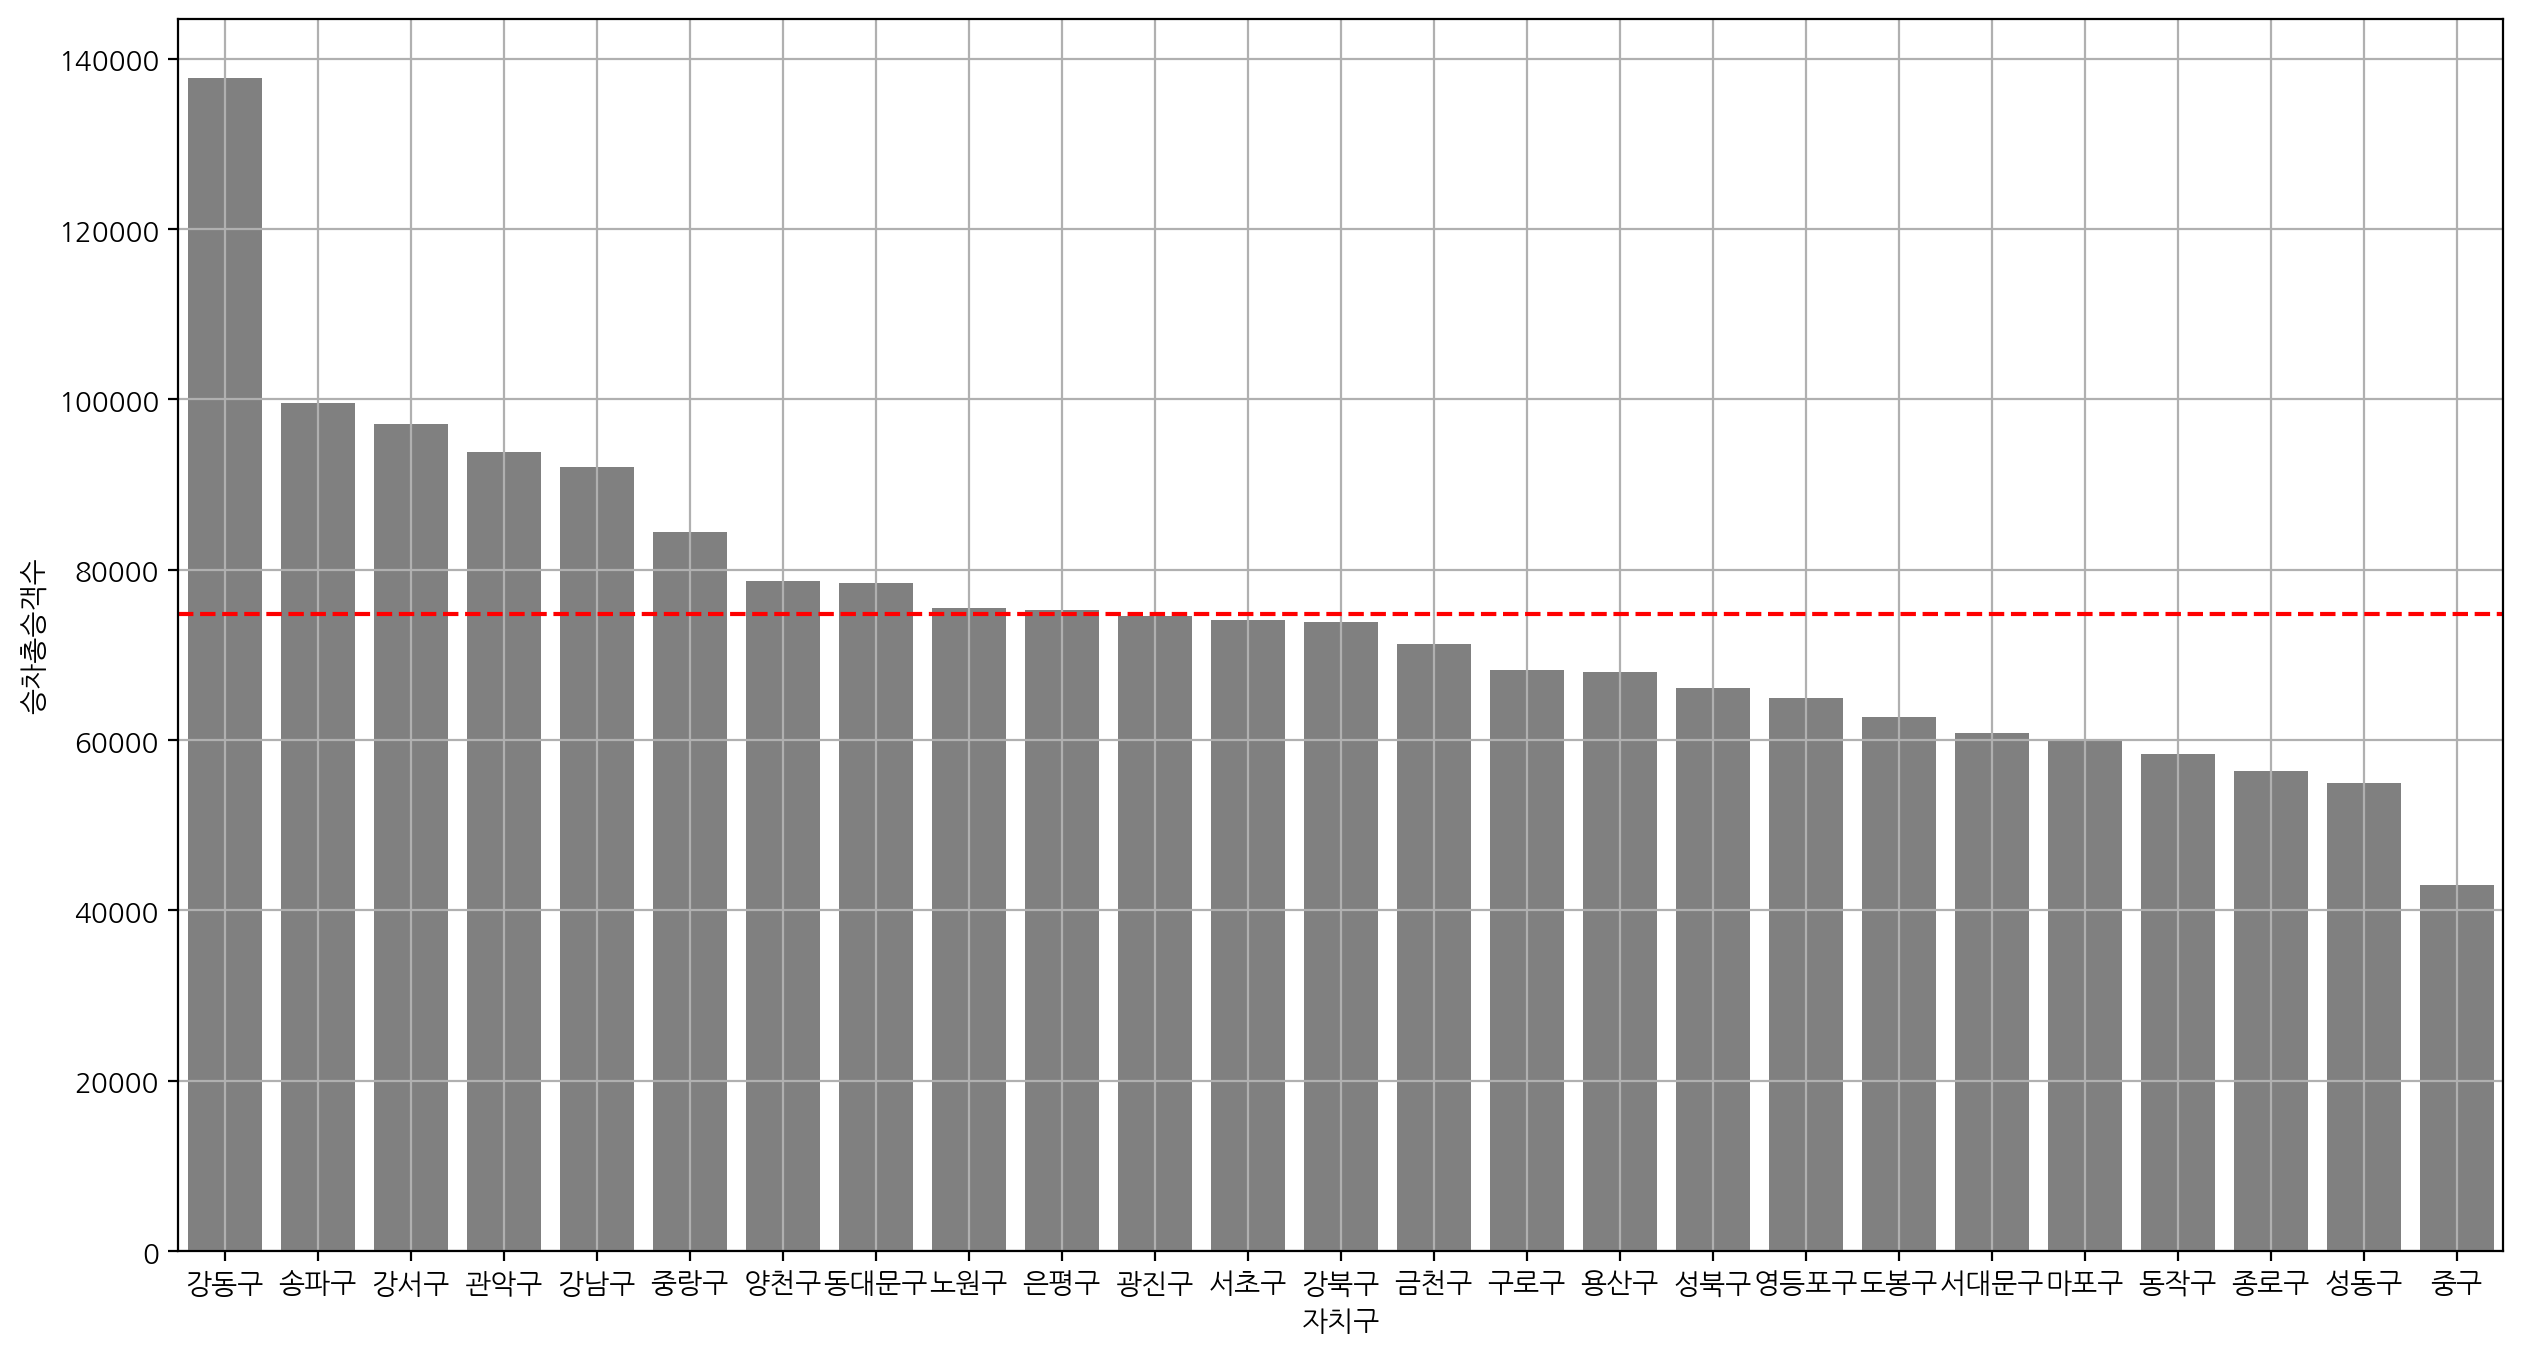

In [88]:
# 주석
# 노선 수 대비 승하차이용객 수가 구마다 다를 것이다.
col = '승차총승객수'
one_variable(col, norm='노선수')
# 의견: 

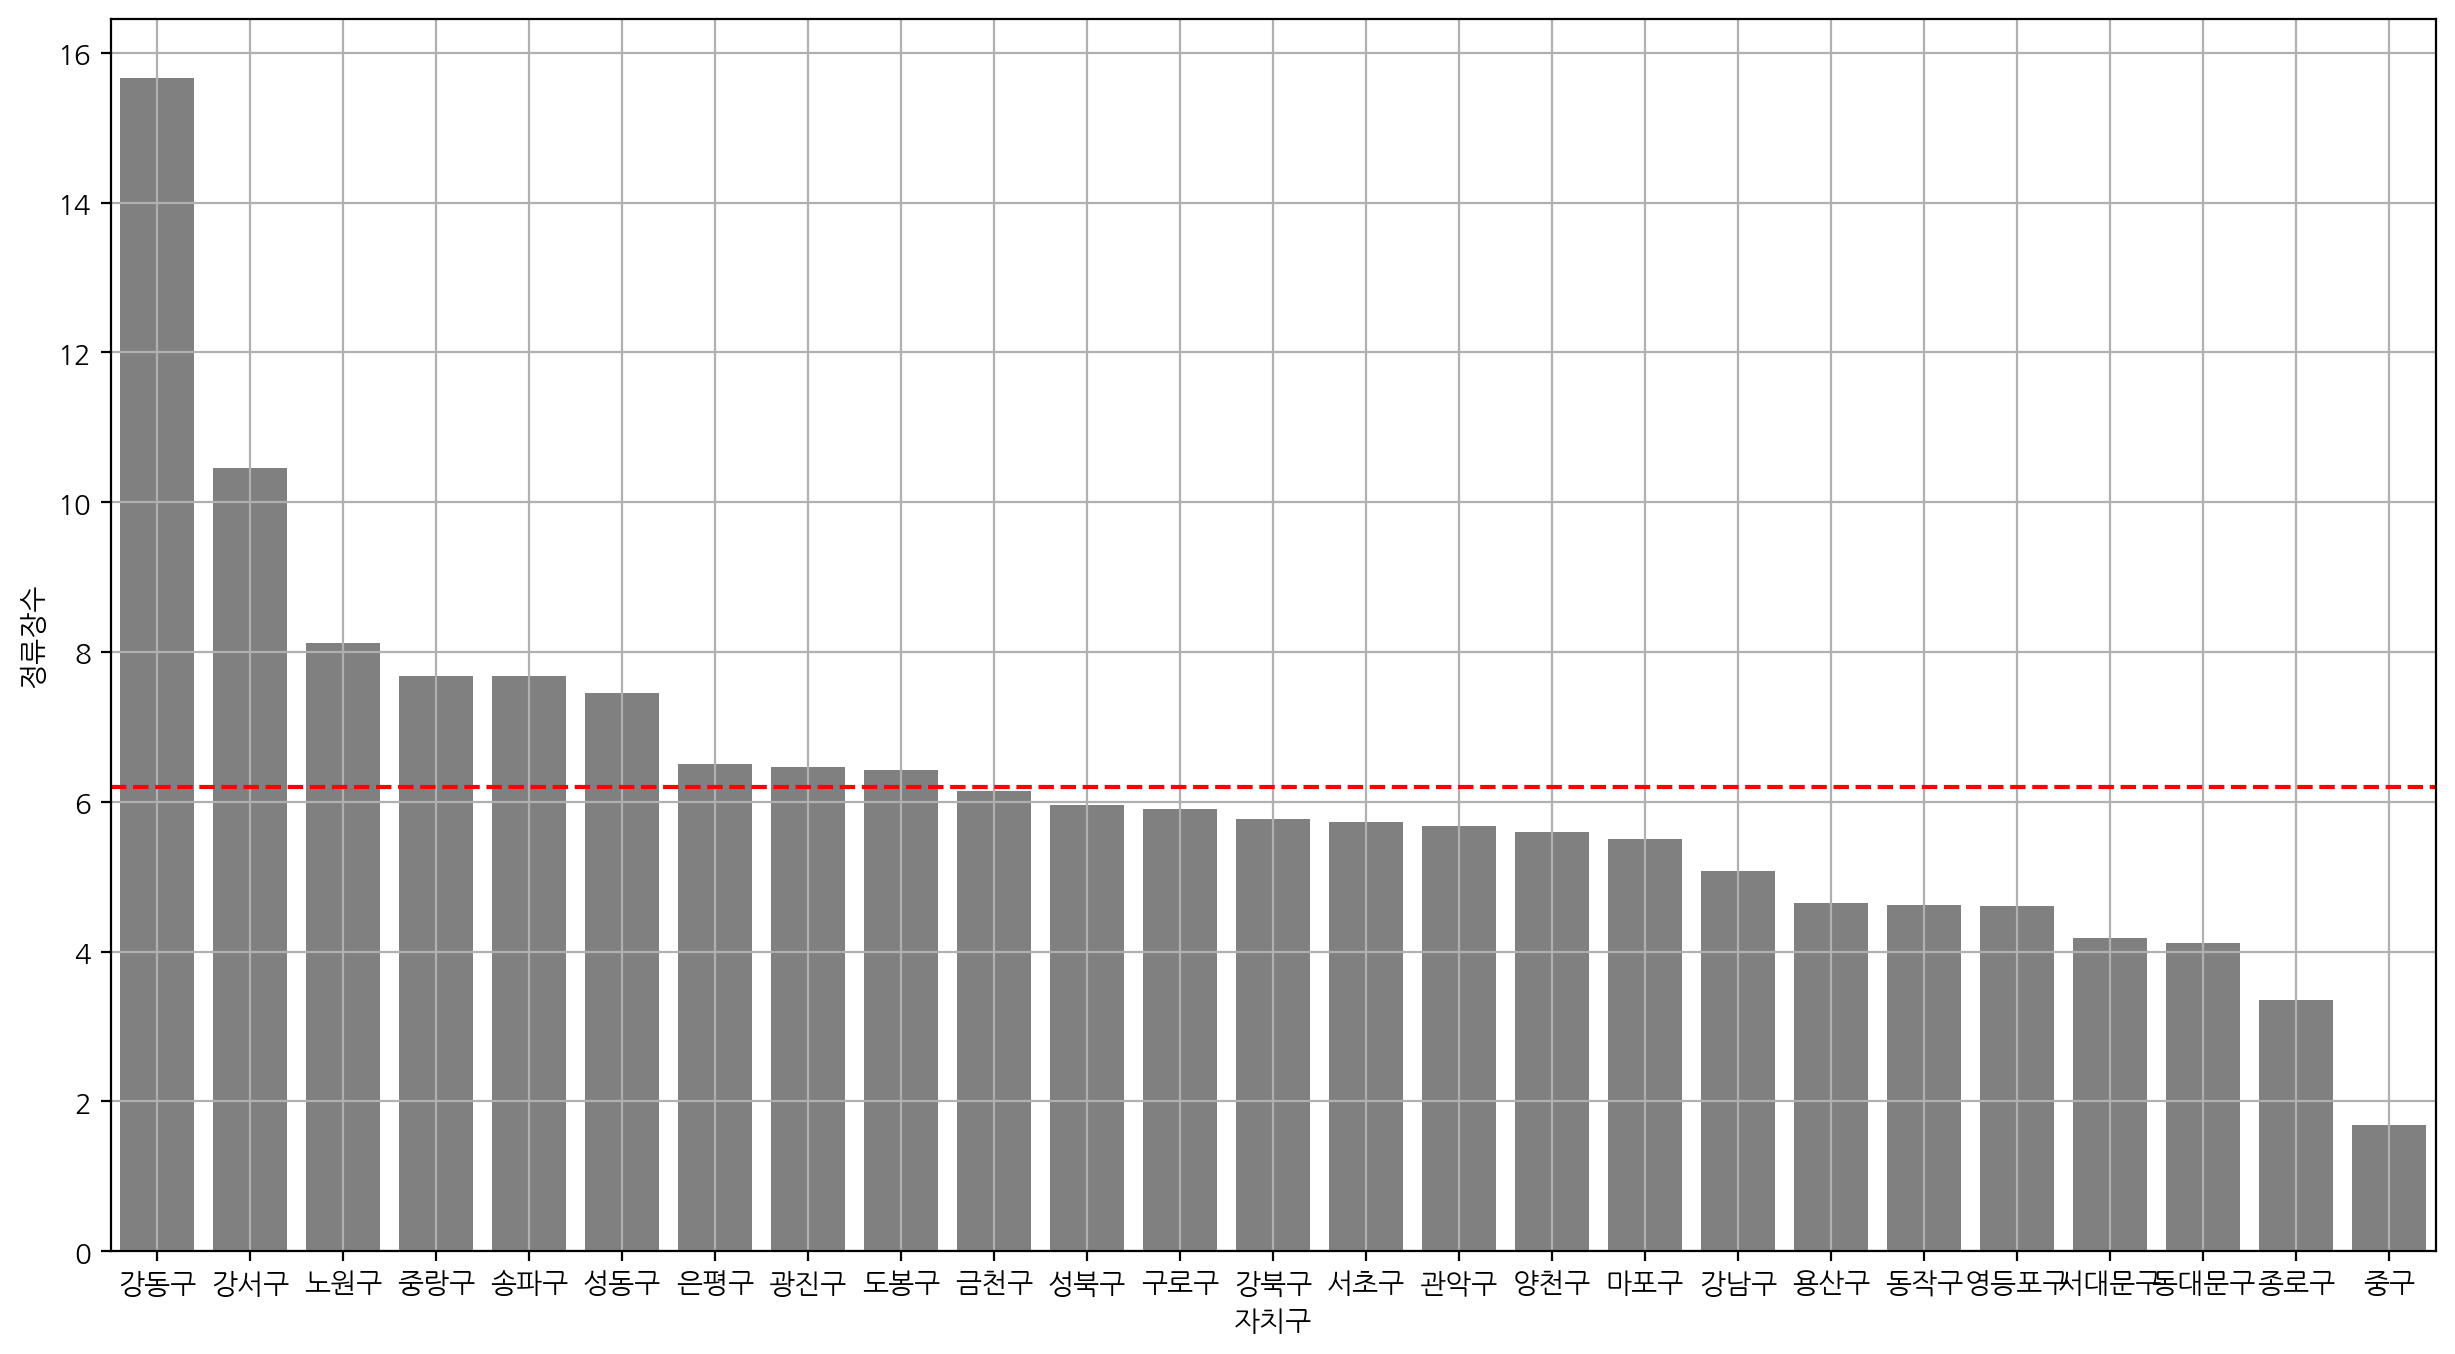

In [66]:
col = '정류장수'
one_variable(col, norm='노선수')

### 2) 가설 2

In [ ]:
# 주석



# 의견:

### 3) 가설 3

In [ ]:
# 주석



# 의견: 

### 4) 가설 4

In [ ]:
# 주석



# 의견: 

### 5) 가설 5

In [ ]:
# 주석



# 의견: 

### HeatMap으로 시각화

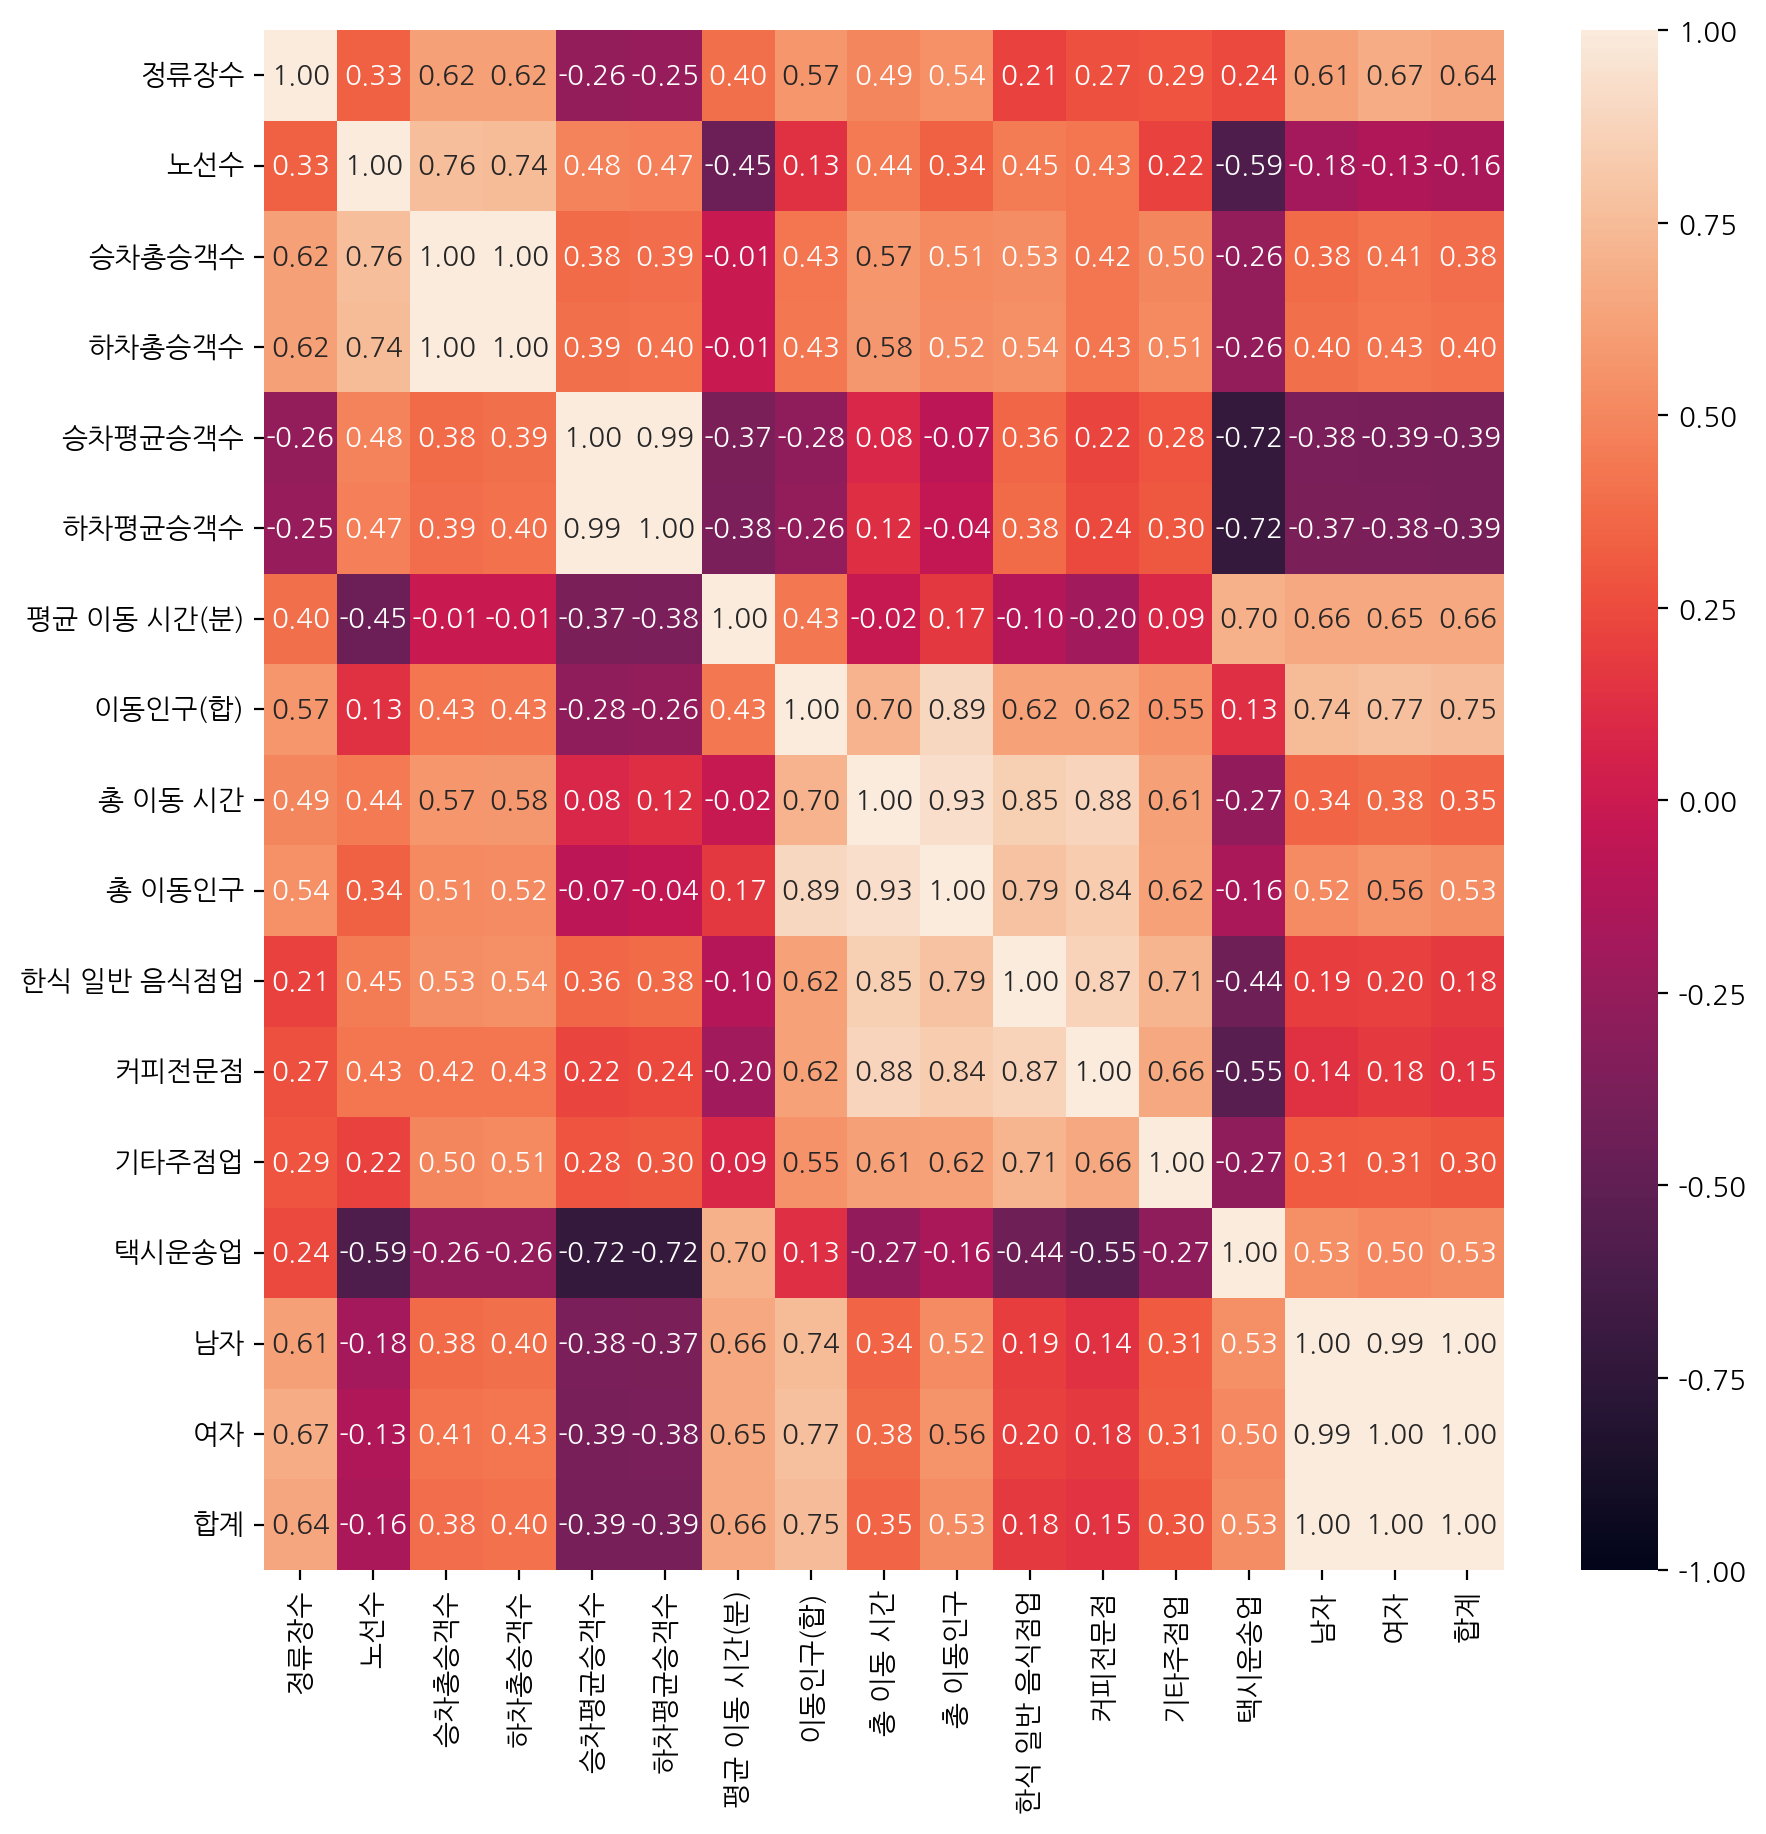

In [91]:
# 상관계수를 HeatMap으로 시각화
corr_df = df.drop(['자치구'], axis=1).corr(method='spearman')

plt.figure(figsize=(10,10))
sns.heatmap(data=corr_df,
            annot=True, fmt='.2f',
            vmin=-1.0, vmax=1.0)

plt.show()


In [62]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 노선 수가 많을 수록 평균 이동시간이 짧아진다.
# 노선 수가 많을 수록 정류장 수도 늘어난다.

# 6. 관계 정리

### 1) 강한 관계의 열

### 2) 중간 관계의 열

# 7. 솔루션 도출

- 위에서 확인된 내용을 기초로하여 노선(또는 정류장) 추가를 제안할 자치구를 확인하세요. 

### 1) 

In [ ]:
# 주석



# 의견: 

### 2) 

In [ ]:
# 주석



# 의견:

### 3) 

In [ ]:
# 주석



# 의견:

### 4) 

In [ ]:
# 주석



# 의견:

### 결론1: 어느 구에 버스 노선 또는 정류장이 제일 필요한가요?

### 결론2: 그 이유는 무엇인가요?